In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
import scipy.stats
import numpy as np
from astropy import units as u
from astropy import constants as c
import sys

import warnings

warnings.filterwarnings('ignore')


In [2]:
homedir = os.getenv("HOME")
gitdir = homedir+'/github/Virgo/'

In [3]:
sys.path.append(homedir+'/github/Virgo/programs')
from virgoCommon import *

Running on Rose's computer


# Read in Kennicutt Halpha Filters #

Rob has a Halphalow and Halphahigh filters.  Got transmission curves from 

http://mogit.as.arizona.edu/90prime_files/Documents/filters/90Prime_filter_tracings/Halpha%20filters.txt

File has transmission for zero deg angle of incidence and 10 deg incidence.


Saved files in ~/github/Virgo/observing/

In [5]:
filepath = gitdir+'observing/'
halow_zero = filepath+'halphalow-zerodeg.txt'
halow_ten = filepath+'halphalow-tendeg.txt'
hahigh_zero = filepath+'halphahigh-zerodeg.txt'
hahigh_ten = filepath+'halphahigh-tendeg.txt'

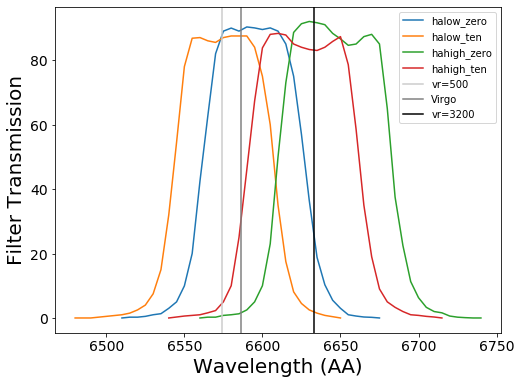

In [64]:
filters = [halow_zero,halow_ten,hahigh_zero,hahigh_ten]
filter_names = ['halow_zero','halow_ten','hahigh_zero','hahigh_ten']
plt.figure(figsize=(8,6))
for i in range(len(filters)):
    d = ascii.read(filters[i])
    plt.plot(d['col1'],d['col2'],label=filter_names[i])


# add virgo
# recession velocity ~ VC = 1050+/-35km s^-1^ from 
#  Binggeli, B.; Popescu, C. C.; Tammann, G. A.
# https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..275B/abstract
# 
# assume a velocity disp of 1000 km/s

lambda_0 = 6563. # angstrom
vcenter = 1050#*u.km/u.s
width = 1000#*u.km/u.s
zcenter = vcenter/3.e5
lambda_obs_center = lambda_0*(1+zcenter)

vmin = vcenter - 0.5*width
zmin = vmin/3.e5
lambda_obs_min = lambda_0*(1+zmin)

vmax = vcenter + 0.5*width
zmax = vmax/3.e5
lambda_obs_max = lambda_0*(1+zmax)

mean = lambda_obs_center 
std = lambda_obs_max - lambda_obs_min


plt.axvline(x=lambda_0*(500./3.e5+1),label='vr=500',color='.8')
plt.axvline(x=lambda_obs_center,ls='-',color='0.5',label='Virgo')
plt.axvline(x=lambda_0*(3200./3.e5+1),label='vr=3200',color='k')
#plt.axvline(x=lambda_obs_min,ls='--',color='k')
#plt.axvline(x=lambda_obs_max,ls='--',color='k')

plt.legend()
plt.xlabel('Wavelength (AA)',fontsize=20)
plt.ylabel('Filter Transmission',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#x_min = 6500
#x_max = 6750
##plt.figure()
#x = np.linspace(x_min, x_max, 100)
#y = scipy.stats.norm.pdf(x,mean,std)
#plt.plot(x,4000*y,'k-',label='Virgo cluster')

plt.savefig('kennicutt_halpha.pdf')

# 2021 Observing Runs

* the info above is from 2020 - never observed

* we need to figure out filter and targets 

In [4]:
plotdir = '/home/rfinn/research/Virgo/plots/'
os.chdir(plotdir)

In [5]:
%run ~/github/Virgo/programs/readtables.py

number of CO with Halpha =  145
number of CO without Halpha =  97


Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

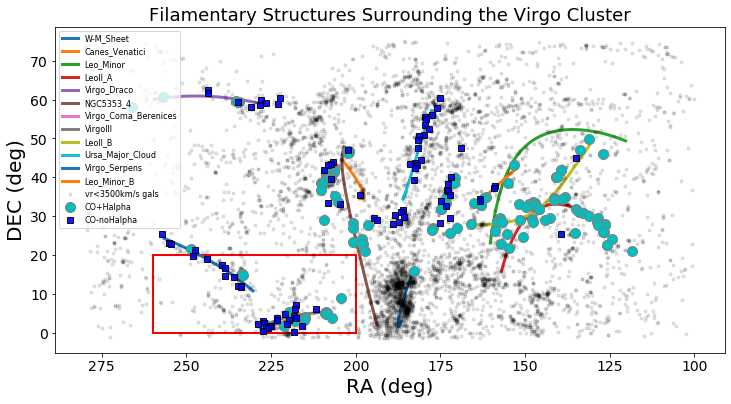

In [17]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

# TODO for March 12-15 and April 13-17 90prime Runs

* email Dick Joyce, Melanie, Dara, Dennis about borrowing Halpha+4nm filter for 90prime
  - confirm that filter is available and exchange between kpno and steward is feasible
  
* airmass plots for general regions

* footprint of 90prime?
  - 1.16 x 1.16 deg 
  - 1.1 x 1.1 deg with mosaic filters (5.75 in, vs 6 in required for full FOV)

* finding charts for 97 remaining CO sources
  - github/Virgo/programs/kpno-halpha.p3.py
  
* Blanco+DECcam time at end of March 24-26

In [18]:
5.75/6*1.16

1.1116666666666666

# Finding Charts

In [39]:
os.chdir(homedir+'/research/Virgo/observing/')
%run ~/github/Virgo/programs/observing-halpha.py
print(len(pointing_ra))

/home/rfinn/github/Virgo/programs/observing-halpha.py:249: RuntimeWarning: divide by zero encountered in log10
  pointing_mag = 22.5 - 2.5 * np.log10(v.nsav0['NMGY'][:,4][obs_mass_flag])


nsa id not found in list of pointings
108


<Figure size 432x288 with 0 Axes>

In [31]:
os.mkdir('2021Mar')

In [36]:
pointing_id[0]

'VFID1728'

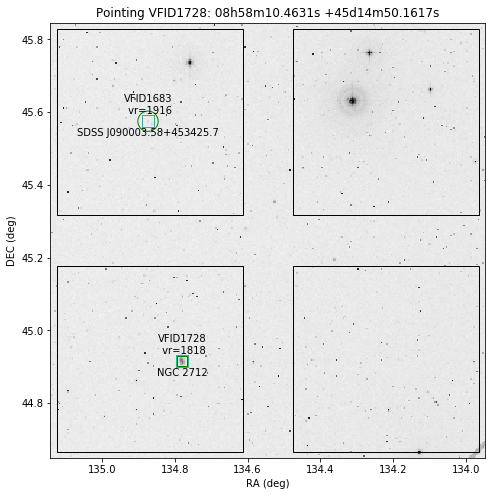

In [40]:
platinum_finding_chart(1,BOK=True)
#plot_BOK_footprint(pointing_ra[0],pointing_dec[0])

nsa id not found in list of pointings
gap_ra = 710.18 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.73
-0.8258608806965323 0.06944444444444445
-0.8258608806965323 -0.5814444444444444
0.09863589241785527 0.06944444444444445
0.09863589241785527 -0.5814444444444444
134.3769295 45.24726713333334 1.2 1.2
pointing  VFID0000  ngal =  2
gap_ra = 555.18 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.57
-0.6456172555817733 0.06944444444444445
-0.6456172555817733 -0.5814444444444444
0.07710883425064943 0.06944444444444445
0.07710883425064943 -0.5814444444444444
138.772066 25.76255593333333 1.2 1.2
pointing  VFID0001  ngal =  2
gap_ra = 634.55 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.65
-0.7379145994753219 0.06944444444444445
-0.7379145994753219 -0.5814444444444444
0.08813221102135048 0.06944444444444445
0.08813221102135048 -0.5814444444444444
158.344699 38.004936533333336 1.2 1.2
pointing  VFID0002  ngal =  1
gap_ra = 631.58 arcsec
gap_dec = 500.00 arcsec
detector_ra_widt

gap_ra = 705.44 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.72
-0.8203519466280231 0.06944444444444445
-0.8203519466280231 -0.5814444444444444
0.0979779453618457 0.06944444444444445
0.0979779453618457 -0.5814444444444444
180.290416 44.86454823333334 1.2 1.2
pointing  VFID0027  ngal =  3
gap_ra = 792.33 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.81
-0.9213922939423009 0.06944444444444445
-0.9213922939423009 -0.5814444444444444
0.11004544652994214 0.06944444444444445
0.11004544652994214 -0.5814444444444444
180.891307 50.87217243333333 1.2 1.2
pointing  VFID0028  ngal =  5
gap_ra = 744.53 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.76
-0.8658041904170679 0.06944444444444445
-0.8658041904170679 -0.5814444444444444
0.10340642673411779 0.06944444444444445
0.10340642673411779 -0.5814444444444444
181.0047595 47.81178713333333 1.2 1.2
pointing  VFID0029  ngal =  2
gap_ra = 776.51 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.80
-0.9029959897191316 0.0694444444

-0.757152234874455 0.06944444444444445
-0.757152234874455 -0.5814444444444444
0.09042982098448048 0.06944444444444445
0.09042982098448048 -0.5814444444444444
206.76897250000002 39.83095673333334 1.2 1.2
pointing  VFID0054  ngal =  11
gap_ra = 691.90 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.71
-0.8046017368422675 0.06944444444444445
-0.8046017368422675 -0.5814444444444444
0.0960968539557299 0.06944444444444445
0.0960968539557299 -0.5814444444444444
207.54077049999998 43.726235933333335 1.2 1.2
pointing  VFID0055  ngal =  7
gap_ra = 601.87 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.62
-0.6999040945372937 0.06944444444444445
-0.6999040945372937 -0.5814444444444444
0.08359249493618896 0.06944444444444445
0.08359249493618896 -0.5814444444444444
207.824161 33.82415773333334 1.2 1.2
pointing  VFID0056  ngal =  2
gap_ra = 674.72 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.69
-0.7846313043267165 0.06944444444444445
-0.7846313043267165 -0.5814444444444444
0.0937117

-0.5821910320896508 -0.5814444444444444
0.0695336121762536 0.06944444444444445
0.0695336121762536 -0.5814444444444444
226.44879550000002 2.9019532333333333 1.2 1.2
pointing  VFID0081  ngal =  5
gap_ra = 500.87 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.51
-0.5824613021660823 0.06944444444444445
-0.5824613021660823 -0.5814444444444444
0.0695658915340391 0.06944444444444445
0.0695658915340391 -0.5814444444444444
226.88989750000002 3.3860713333333337 1.2 1.2
pointing  VFID0082  ngal =  2
gap_ra = 500.05 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.51
-0.581501615130805 0.06944444444444445
-0.581501615130805 -0.5814444444444444
0.0694512725516524 0.06944444444444445
0.0694512725516524 -0.5814444444444444
226.95586 0.8034357333333333 1.2 1.2
pointing  VFID0083  ngal =  10
gap_ra = 1004.32 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 1.03
-1.1679251267838913 0.06944444444444445
-1.1679251267838913 -0.5814444444444444
0.13948923974295582 0.06944444444444445
0.139489239

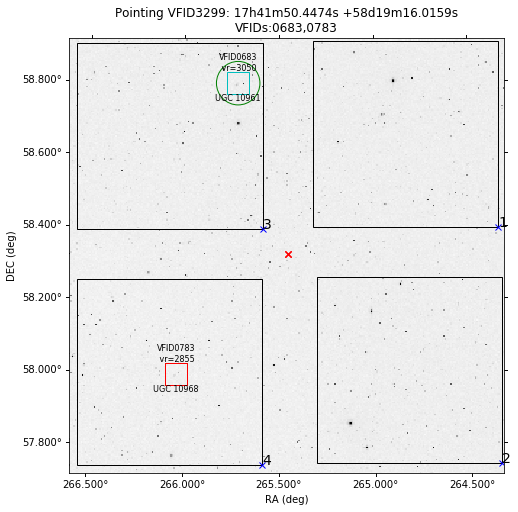

In [243]:
os.chdir(homedir+'/research/Virgo/observing/')
%run ~/github/Virgo/programs/observing-halpha.py
make_all_platinum(BOK=True)

# Adding shifts to maximize the number of galaxies in each pointing

* for 90prime, our main targets are going in the bottom two chips.

In [85]:
ra = v.main['RA']
dec = v.main['DEC']
cra,cdec,dra,ddec = 233.85566083333333, 59.70875456666667, 1.2, 1.2
ramin = cra-.5*dra
ramax = cra + 0.5*dra
decmin = cdec-.5*ddec
decmax = cdec + 0.5*ddec
flag = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax)
print(sum(flag))

5


In [91]:
v.main['RA'][v.main['VFID']=='VFID0603']

<Column name='RA' dtype='float64' length=1>
234.4723275

In [388]:
vfdict['VFID6165']

76

problem setting offset for VFID2797 - already observed, or in INT filter gap?
217.6187425 0.7940297999999999 1.2 1.2
pointing  VFID0057  ngal =  2


<Figure size 432x288 with 0 Axes>

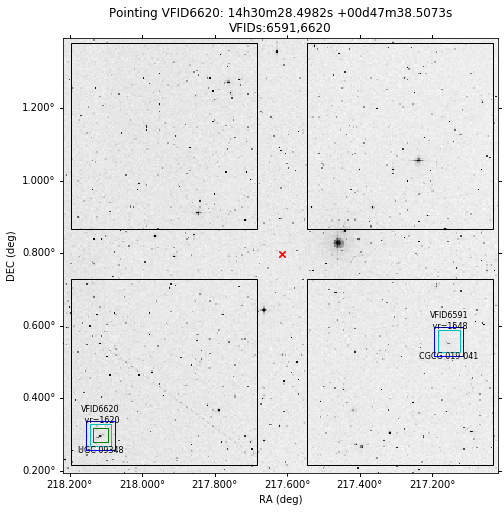

In [432]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID6620'],BOK=True)
#rect = plt.Rectangle((233.85566083333333, 59.70875456666667),10,10,color='r')
#plt.gca().add_artist(rect)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
217.6187425 0.7940297999999999 1.2 1.2
pointing  VFID0057  ngal =  2


<Figure size 432x288 with 0 Axes>

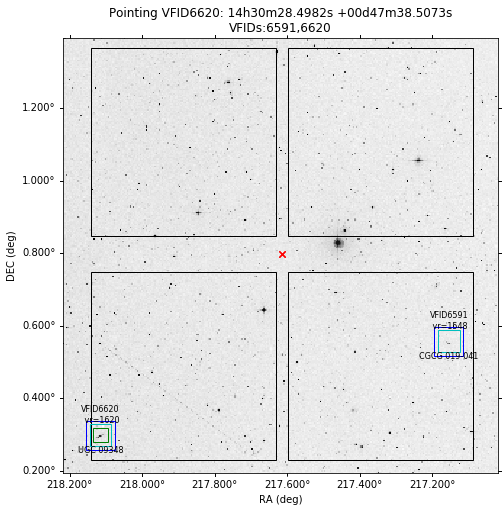

In [13]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID6620'],BOK=True)
#rect = plt.Rectangle((233.85566083333333, 59.70875456666667),10,10,color='r')
#plt.gca().add_artist(rect)

In [241]:
convert_angle_2ra(1,59.2)

1.9530312602289264

# Airmass Plots for 2021-March Bok Run



problem setting offset for VFID2797 - already observed, or in INT filter gap?
plotting airmass curves for Kitt Peak
12
plot 1 of 12
plot 2 of 12
plot 3 of 12
plot 4 of 12
plot 5 of 12
plot 6 of 12
plot 7 of 12
plot 8 of 12
plot 9 of 12
plot 10 of 12
plot 11 of 12
plot 12 of 12


<Figure size 432x288 with 0 Axes>

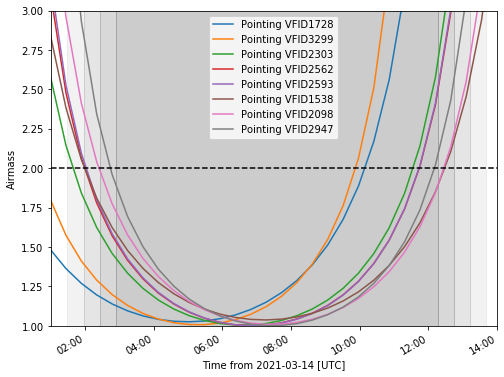

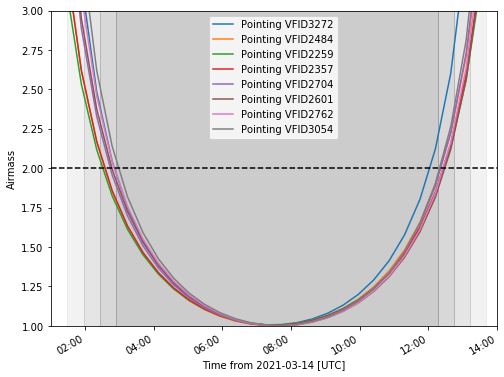

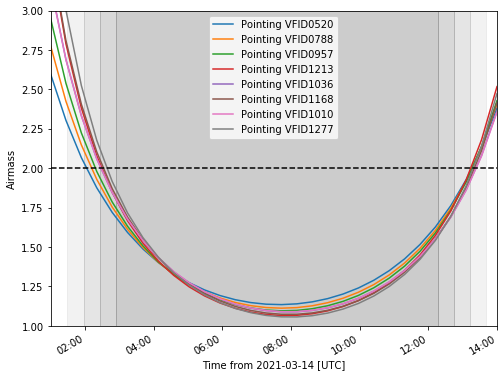

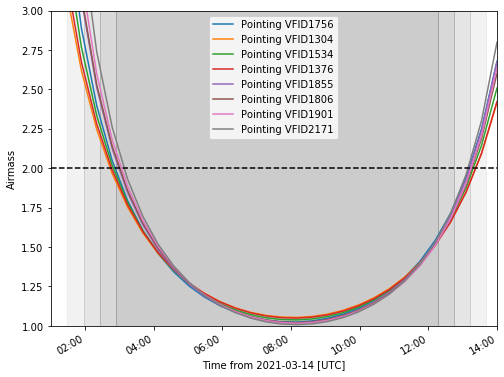

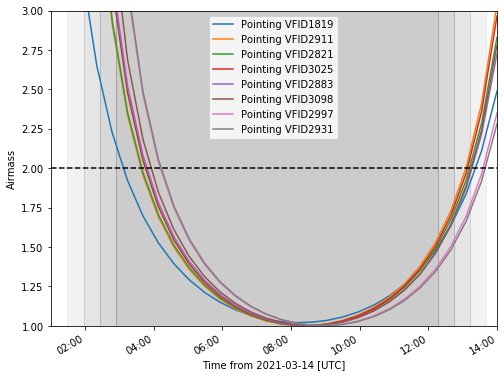

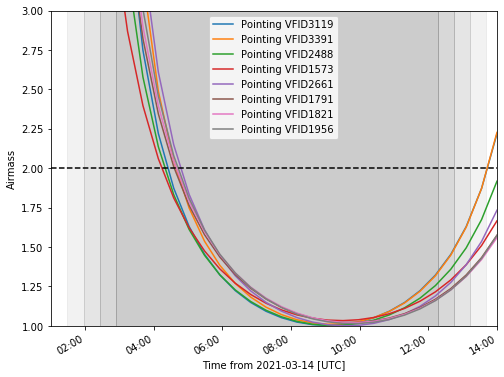

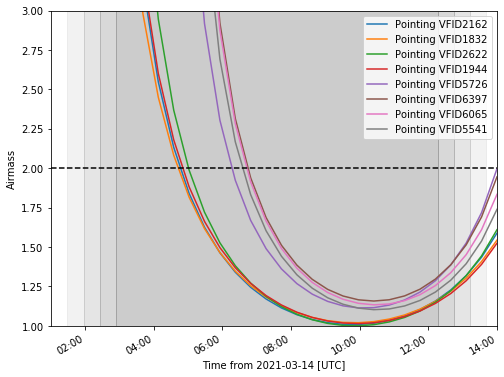

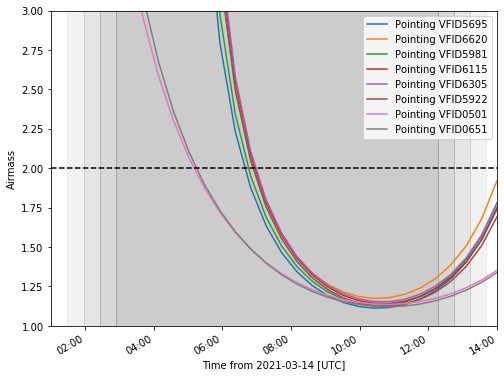

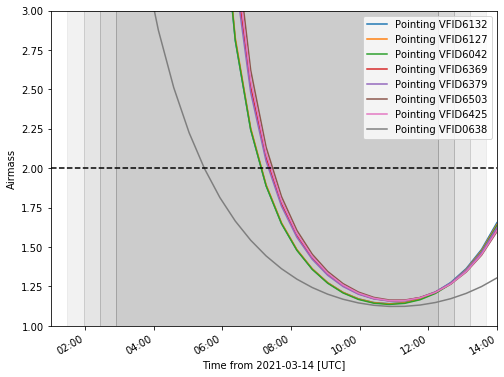

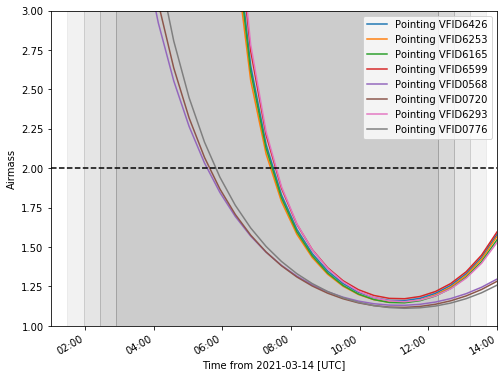

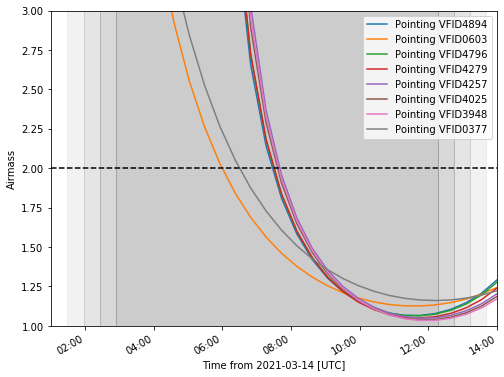

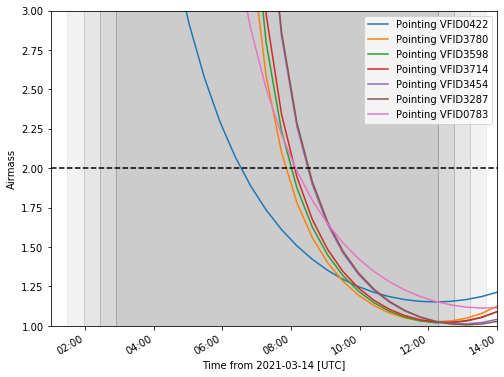

In [9]:
%run ~/github/Virgo/programs/observing-halpha.py
airmass_plotsv2(pointing_id,KPNO=True)

# Things to check

* (filter correction < 2. and CO) and Becky images (Virgo III)
* are r and Halpha expected to have the same focus?  If not, what is the typical offset between the two?
  * will need to focus in each filter and measure the offset
  
* finding charts 
* dither script for each object and filter
  * Greg is doing this
  * program is in github/Virgo/programs/
* airmass plots

* observing plan for each night

# Generating dither scripts

In [4]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py

problem setting offset for VFID2797 - already observed, or in INT filter gap?


In [4]:
sys.path.append(homedir+'/github/Virgo/programs/')
from bok_dither_make import bok_dither_make

085930.46 +445450.2
085932.82 +445515.2
085928.11 +445520.2
085927.64 +445425.2
085933.29 +445420.2
085930.46 +445450.2
085932.82 +445515.2
085928.11 +445520.2
085927.64 +445425.2
085933.29 +445420.2
091801.30 +252545.2
091803.14 +252610.2
091759.45 +252615.2
091759.08 +252520.2
091803.51 +252515.2
091801.30 +252545.2
091803.14 +252610.2
091759.45 +252615.2
091759.08 +252520.2
091803.51 +252515.2
103558.73 +372917.8
103600.83 +372942.8
103556.63 +372947.8
103556.21 +372852.8
103601.25 +372847.8
103558.73 +372917.8
103600.83 +372942.8
103556.63 +372947.8
103556.21 +372852.8
103601.25 +372847.8
105238.36 +343358.8
105240.38 +343423.8
105236.33 +343428.8
105235.93 +343333.8
105240.79 +343328.8
105238.36 +343358.8
105240.38 +343423.8
105236.33 +343428.8
105235.93 +343333.8
105240.79 +343328.8
105336.10 +335007.3
105338.11 +335032.3
105334.10 +335037.3
105333.70 +334942.3
105338.51 +334937.3
105336.10 +335007.3
105338.11 +335032.3
105334.10 +335037.3
105333.70 +334942.3
105338.51 +334937.3


130537.85 +274332.6
131246.68 +235542.1
131248.51 +235607.1
131244.86 +235612.1
131244.50 +235517.1
131248.87 +235512.1
131246.68 +235542.1
131248.51 +235607.1
131244.86 +235612.1
131244.50 +235517.1
131248.87 +235512.1
131446.59 +352612.6
131448.64 +352637.6
131444.55 +352642.6
131444.14 +352547.6
131449.05 +352542.6
131446.59 +352612.6
131448.64 +352637.6
131444.55 +352642.6
131444.14 +352547.6
131449.05 +352542.6
132909.26 +464137.8
132911.69 +464202.8
132906.83 +464207.8
132906.35 +464112.8
132912.18 +464107.8
132909.26 +464137.8
132911.69 +464202.8
132906.83 +464207.8
132906.35 +464112.8
132912.18 +464107.8
133804.76 +330104.0
133806.75 +330129.0
133802.78 +330134.0
133802.38 +330039.0
133807.15 +330034.0
133804.76 +330104.0
133806.75 +330129.0
133802.78 +330134.0
133802.38 +330039.0
133807.15 +330034.0
134623.67 +435220.0
134625.99 +435245.0
134621.36 +435250.0
134620.90 +435155.0
134626.45 +435150.0
134623.67 +435220.0
134625.99 +435245.0
134621.36 +435250.0
134620.90 +435155.0


153721.43 +592206.5
153729.28 +592201.5
153837.95 +121311.8
153839.65 +121336.8
153836.24 +121341.8
153835.90 +121246.8
153840.00 +121241.8
153837.95 +121311.8
153839.65 +121336.8
153836.24 +121341.8
153835.90 +121246.8
153840.00 +121241.8
154343.94 +141808.7
154345.66 +141833.7
154342.22 +141838.7
154341.88 +141743.7
154346.01 +141738.7
154343.94 +141808.7
154345.66 +141833.7
154342.22 +141838.7
154341.88 +141743.7
154346.01 +141738.7
155505.91 +143604.2
155507.63 +143629.2
155504.18 +143634.2
155503.84 +143539.2
155507.97 +143534.2
155505.91 +143604.2
155507.63 +143629.2
155504.18 +143634.2
155503.84 +143539.2
155507.97 +143534.2
155521.24 +163702.0
155522.98 +163727.0
155519.50 +163732.0
155519.15 +163637.0
155523.33 +163632.0
155521.24 +163702.0
155522.98 +163727.0
155519.50 +163732.0
155519.15 +163637.0
155523.33 +163632.0
155912.34 +172629.3
155914.09 +172654.3
155910.60 +172659.3
155910.25 +172604.3
155914.44 +172559.3
155912.34 +172629.3
155914.09 +172654.3
155910.60 +172659.3


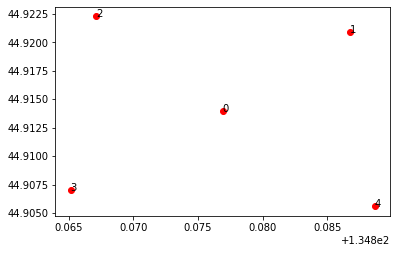

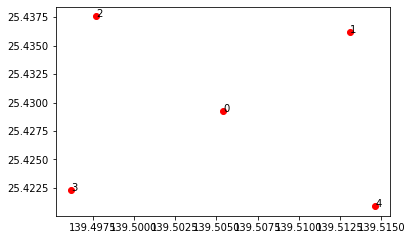

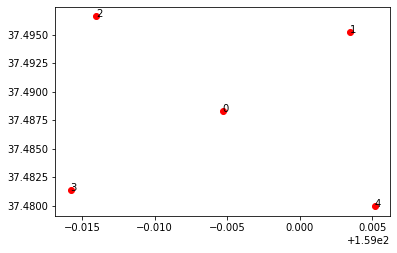

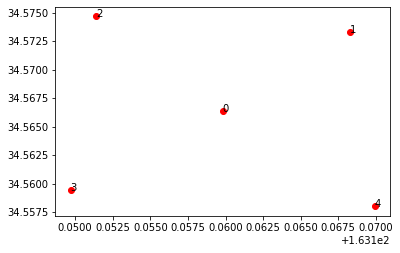

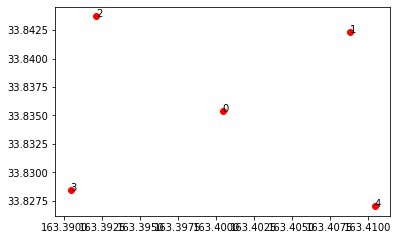

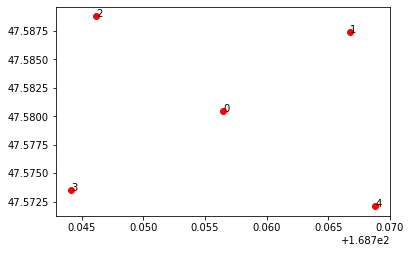

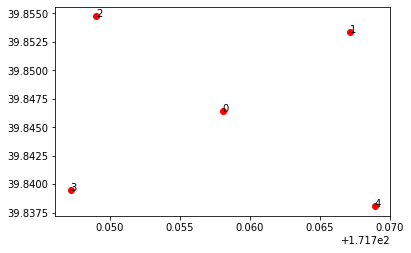

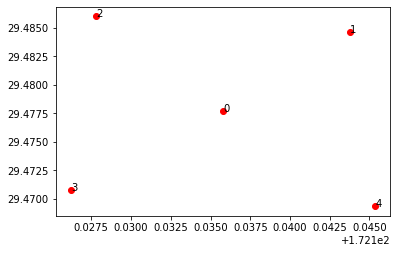

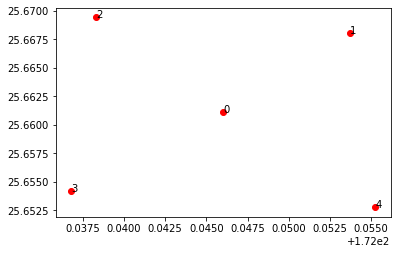

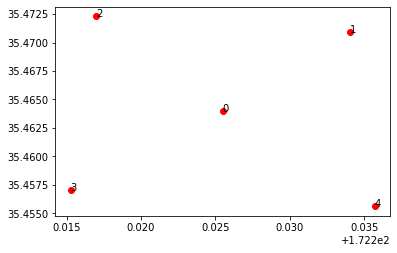

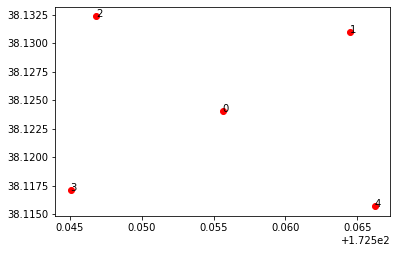

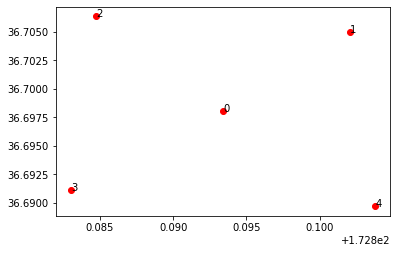

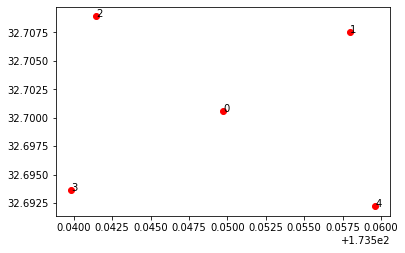

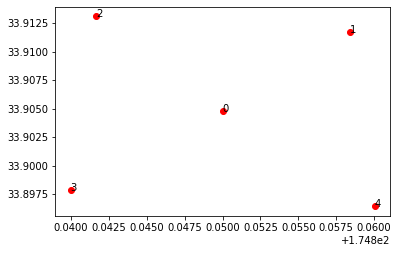

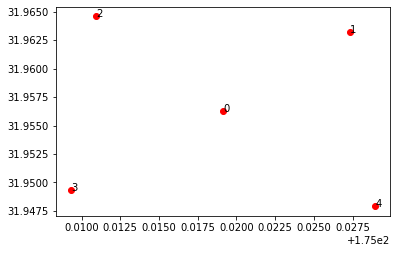

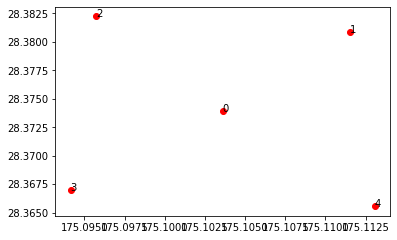

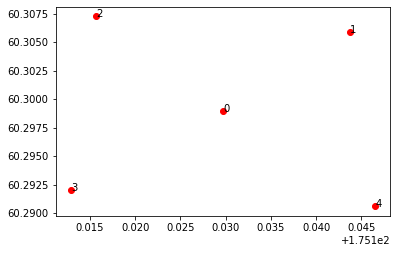

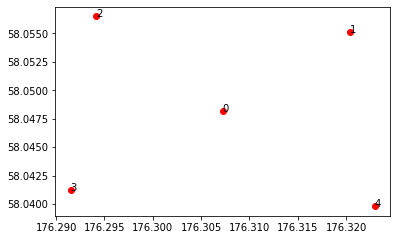

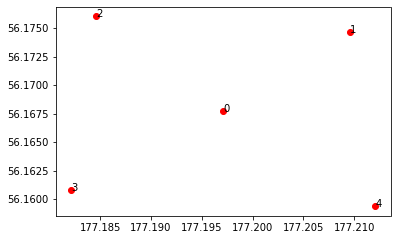

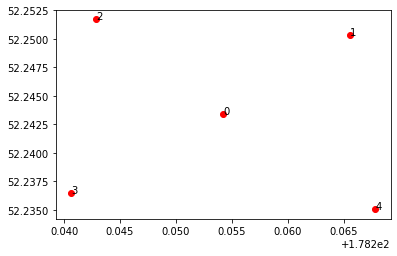

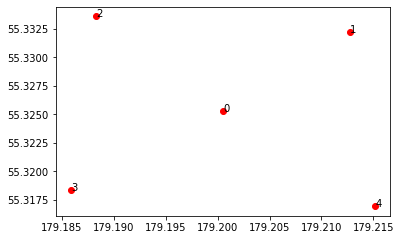

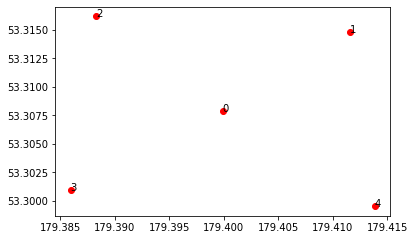

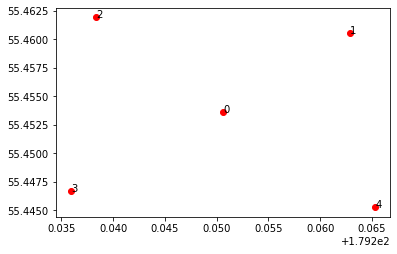

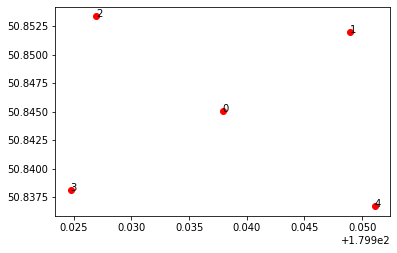

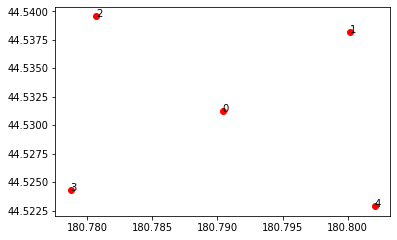

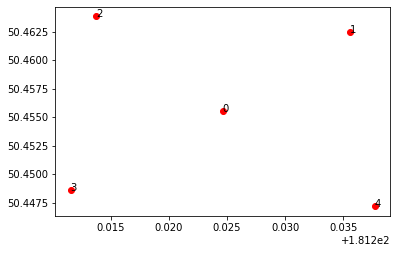

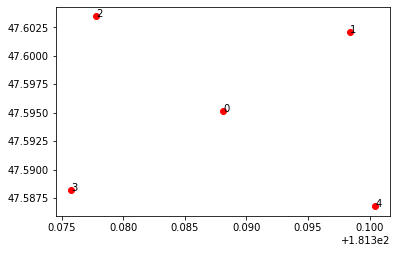

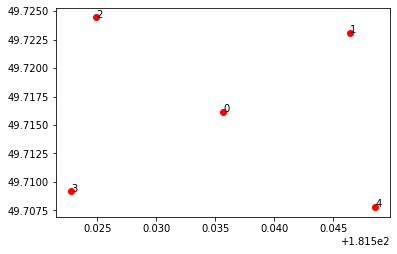

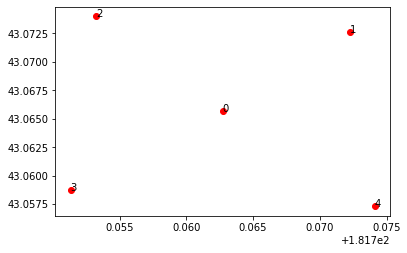

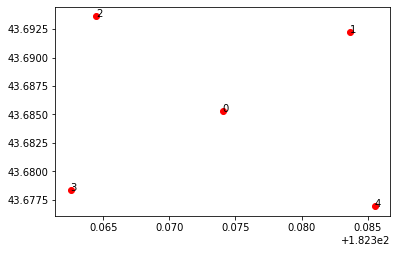

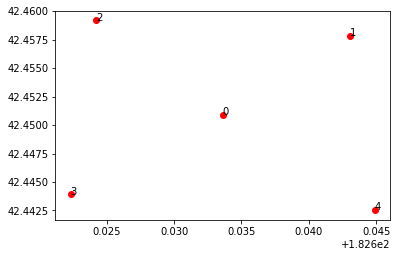

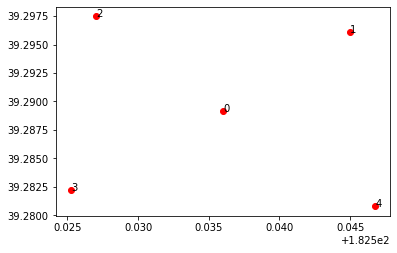

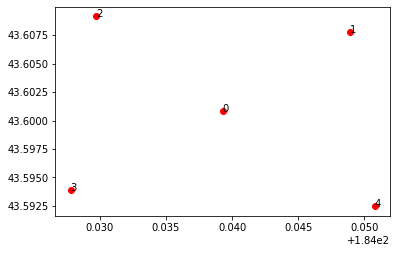

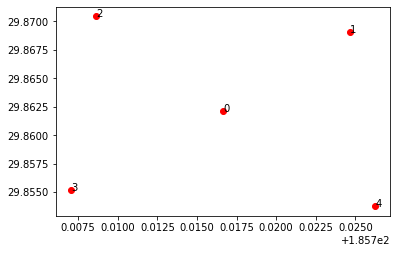

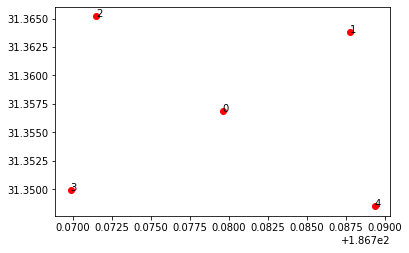

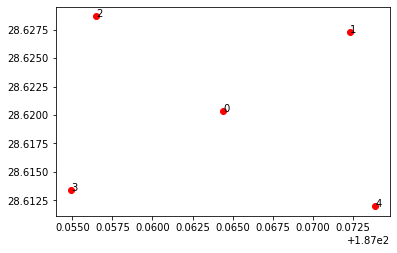

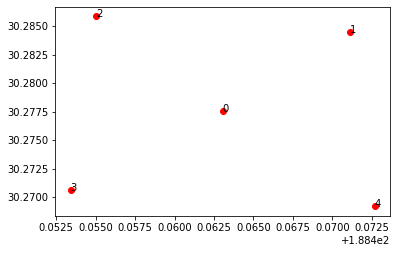

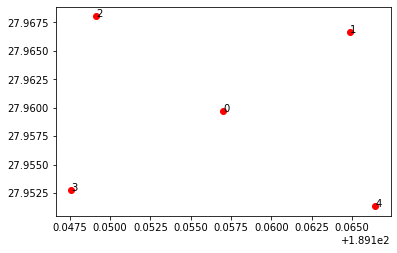

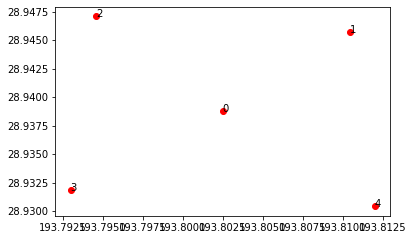

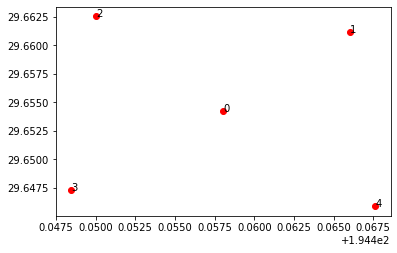

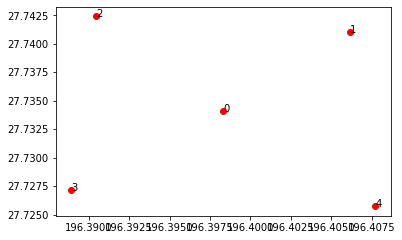

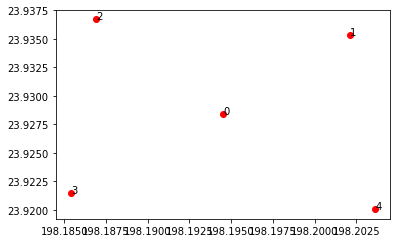

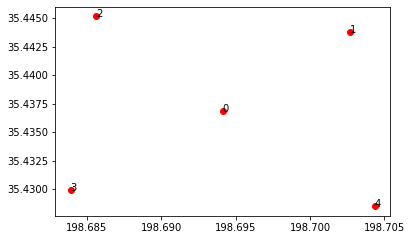

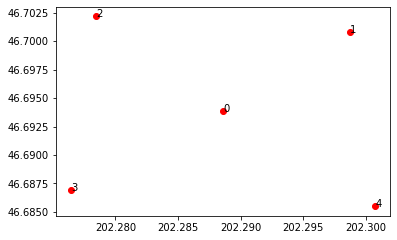

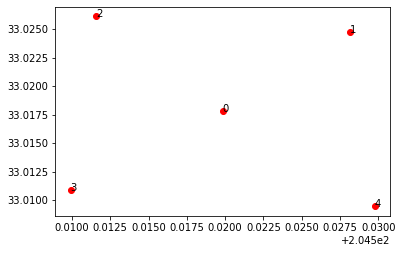

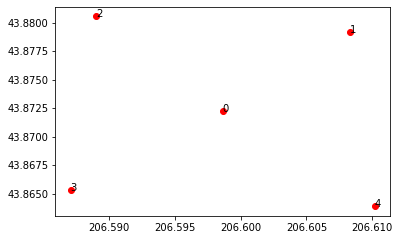

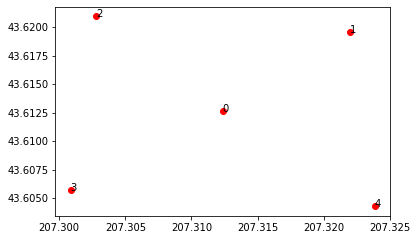

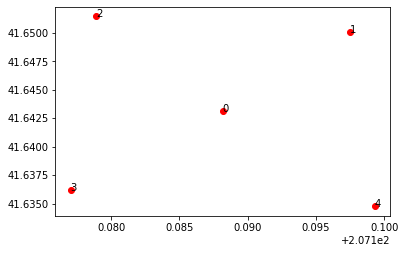

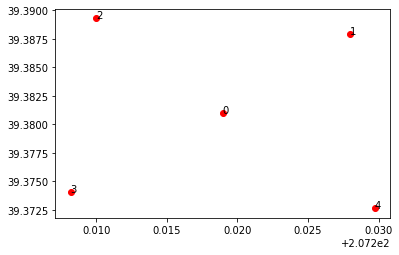

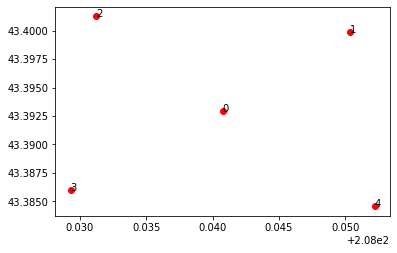

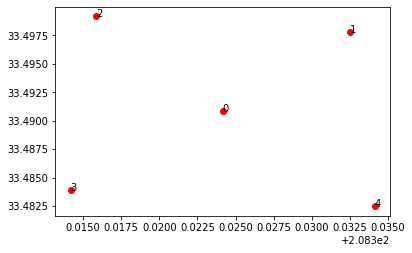

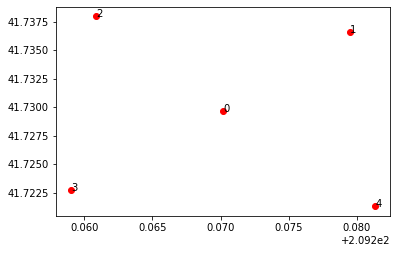

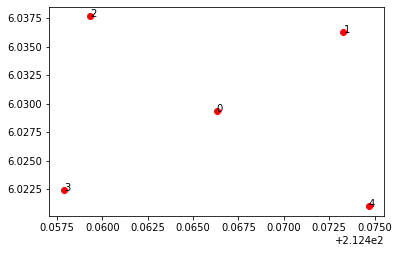

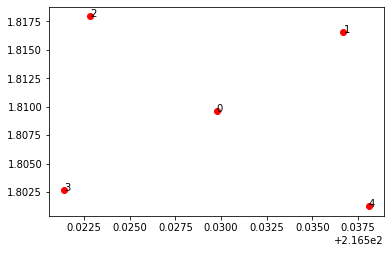

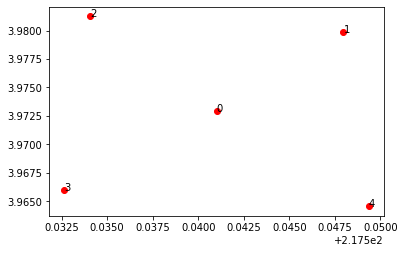

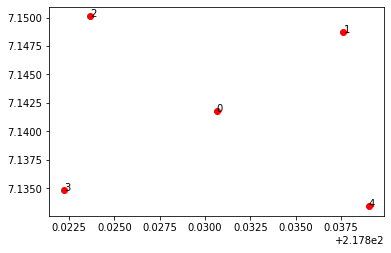

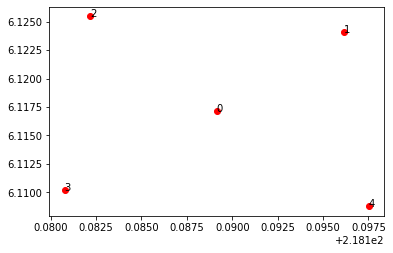

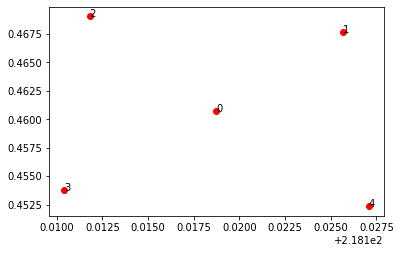

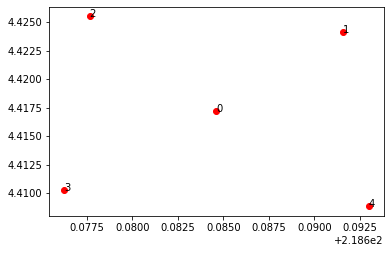

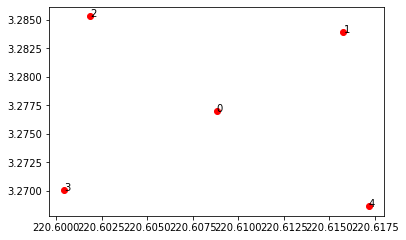

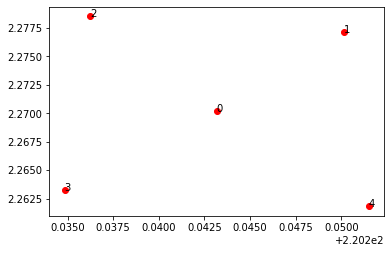

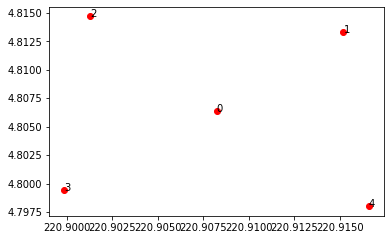

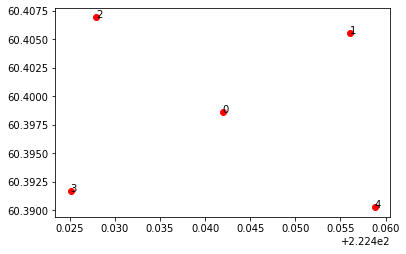

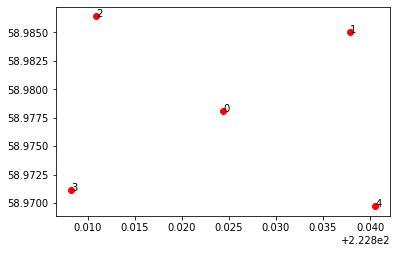

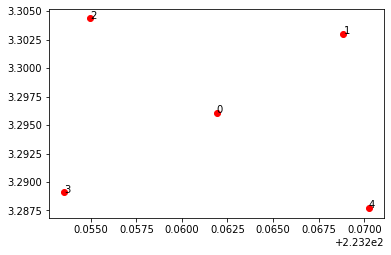

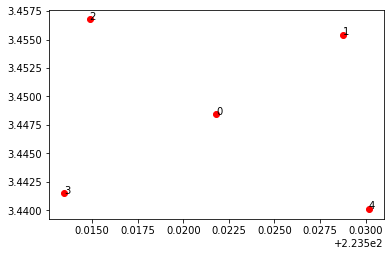

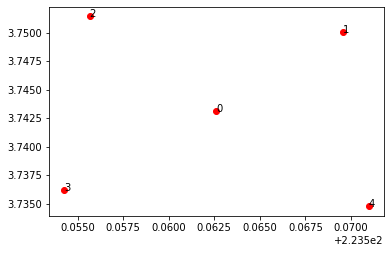

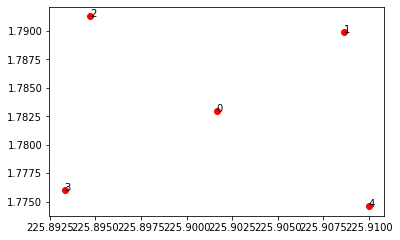

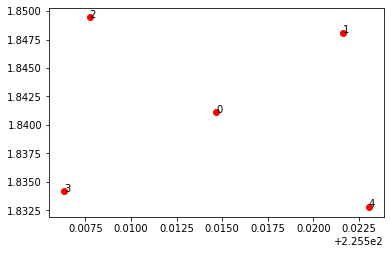

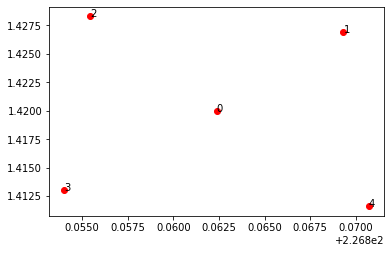

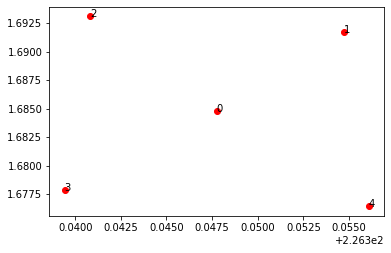

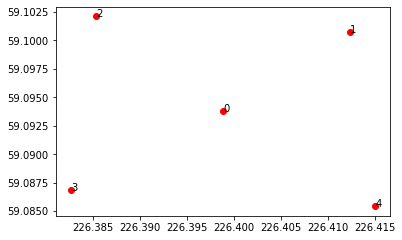

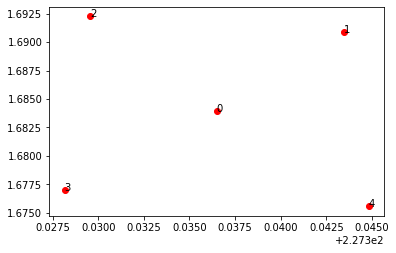

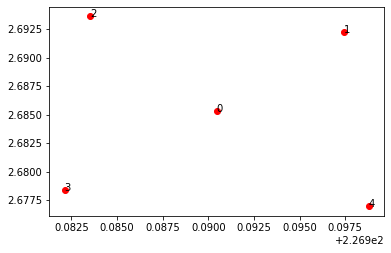

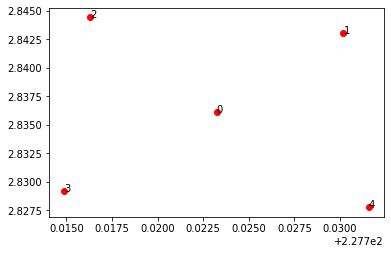

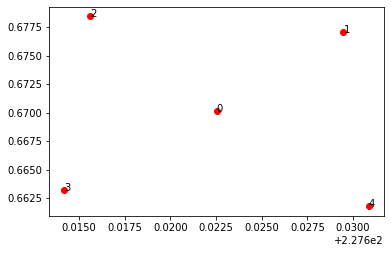

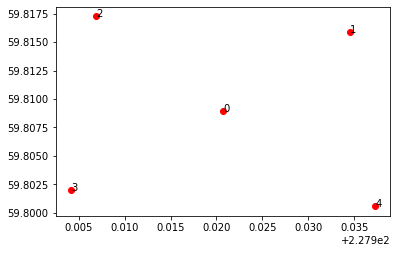

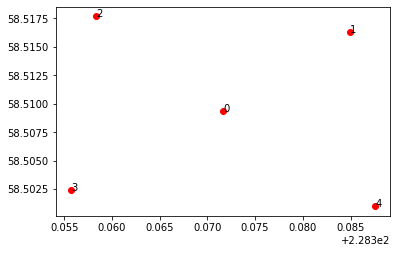

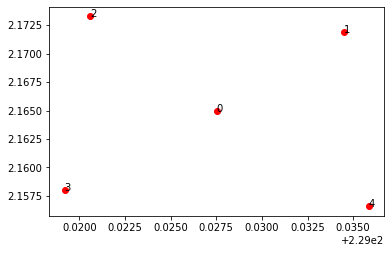

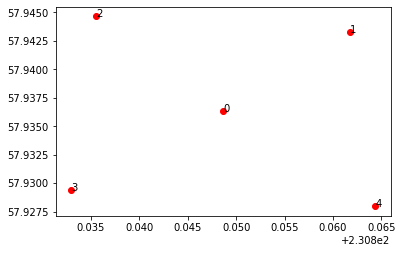

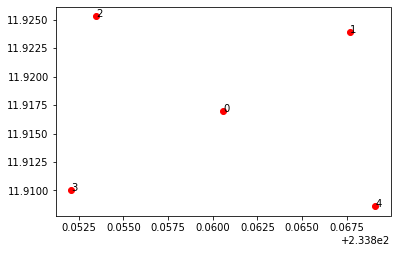

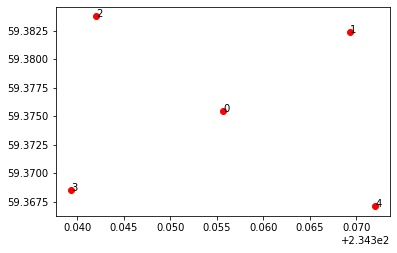

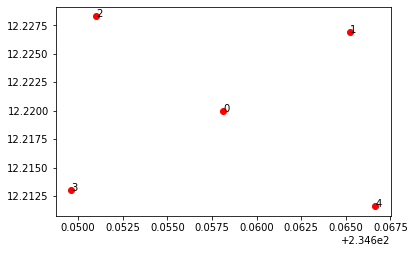

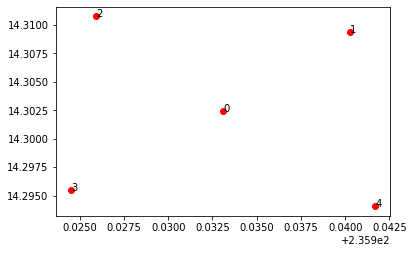

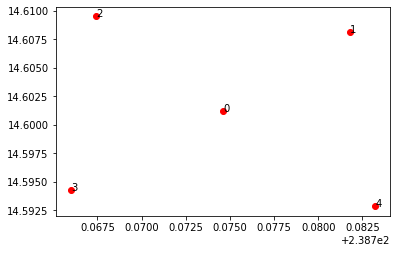

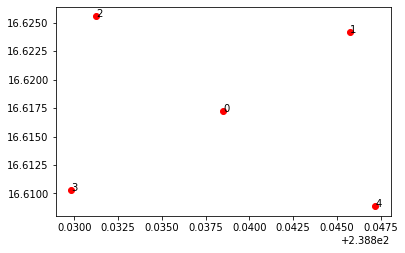

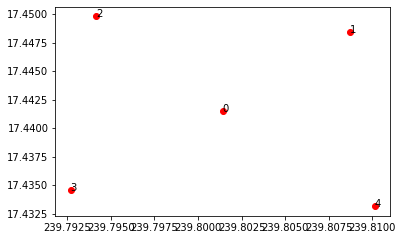

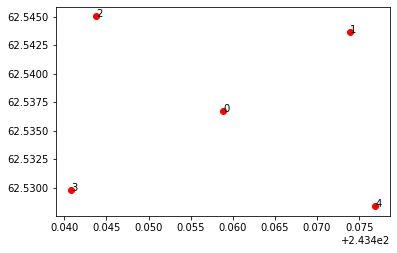

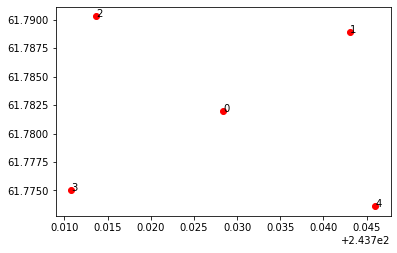

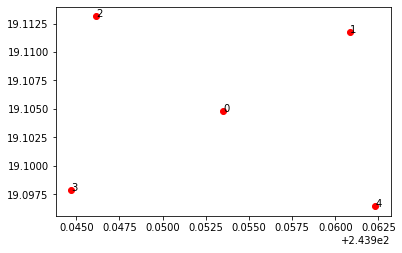

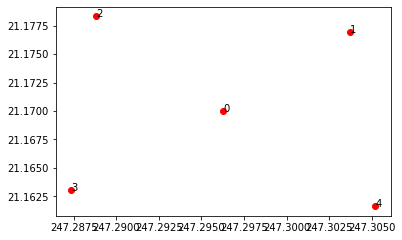

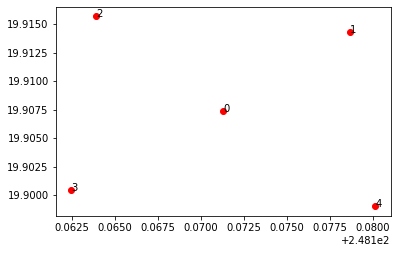

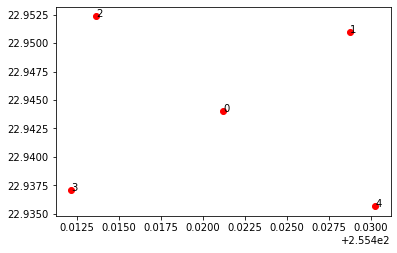

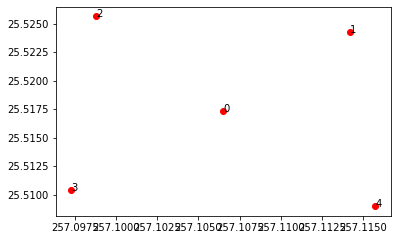

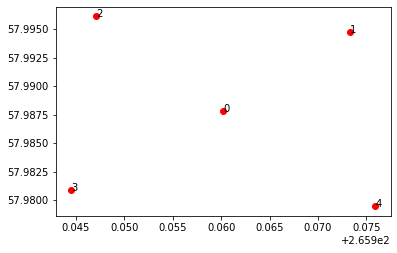

In [7]:
for i,id in enumerate(pointing_id):
    bok_dither_make(id,pointing_ra[i],pointing_dec[i])

In [215]:
for i,ra in enumerate(pointing_ra):
    bok
    pass

        RA        
------------------
       134.8769295
        139.272066
        158.844699
159.06770400000002
163.15982250000002
       163.2837705
168.77312016666667
       171.8414175
         172.00245
       172.0460145
               ...
       239.6347605
243.45883333333336
243.72837566666666
243.87017100000003
247.36293600000002
248.08795500000002
        254.536089
255.18787200000003
       255.2096895
       257.1064935
 265.9601976666667
Length = 106 rows
       DEC        
------------------
        44.9139338
        25.4292226
        37.6716032
        37.3246539
        34.4829984
        33.9103583
47.563764066666664
         40.013067
        29.5110084
        25.6610799
               ...
        17.4414742
        62.5366944
        61.7819444
        18.9047852
        21.3366323
         19.824008
        22.9850973
        23.0440007
        23.0110376
        25.5172991
        57.9877822
Length = 106 rows
  VFID  
--------
VFID1728
VFID3299
VFID2303
VFID231

In [8]:
2036*2


4072

In [9]:
2048*2


4096

# Pixel Scale

In [14]:
.00027777778450399 * 3600

1.0000000242143638

In [16]:
4096*2*.455/3600


1.0353777777777777

# Redoing finding charts with new chip information

# VFID 2303

problem setting offset for VFID2797 - already observed, or in INT filter gap?
159.39376848046217 37.754936533333336 1.2 1.2
pointing  VFID0002  ngal =  2


<Figure size 432x288 with 0 Axes>

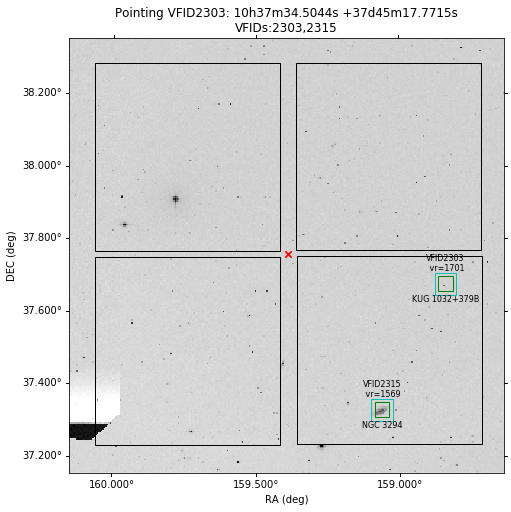

In [44]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2303'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
103734.50 +374517.8
103737.03 +374547.8
103731.97 +374552.8
103731.55 +374447.8
103737.46 +374442.8
103734.50 +374517.8
103737.03 +374547.8
103731.97 +374552.8
103731.55 +374447.8
103737.46 +374442.8
103736.19 +374537.8
103738.72 +374607.8
103733.66 +374612.8
103733.24 +374507.8
103739.14 +374502.8


<Figure size 432x288 with 0 Axes>

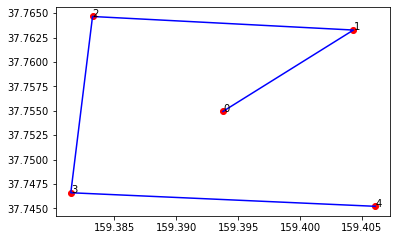

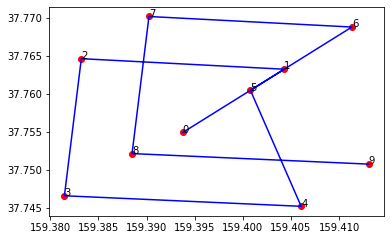

In [45]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2303']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 1728

problem setting offset for VFID2797 - already observed, or in INT filter gap?
135.17044337457486 45.24726713333334 1.2 1.2
pointing  VFID0000  ngal =  2


<Figure size 432x288 with 0 Axes>

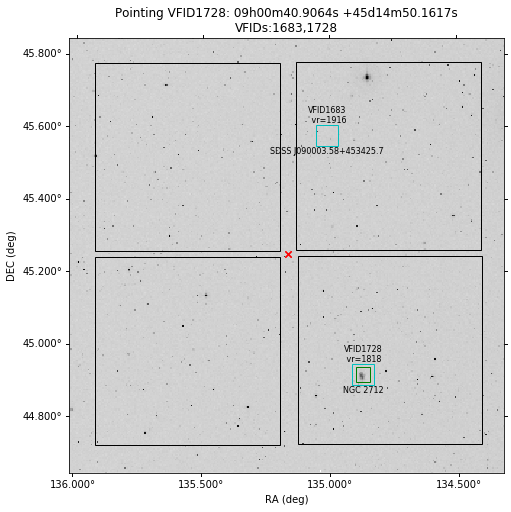

In [46]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID1728'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
090040.91 +451450.2
090043.75 +451520.2
090038.07 +451525.2
090037.59 +451420.2
090044.22 +451415.2
090040.91 +451450.2
090043.75 +451520.2
090038.07 +451525.2
090037.59 +451420.2
090044.22 +451415.2
090042.80 +451510.2
090045.64 +451540.2
090039.96 +451545.2
090039.49 +451440.2
090046.11 +451435.2


<Figure size 432x288 with 0 Axes>

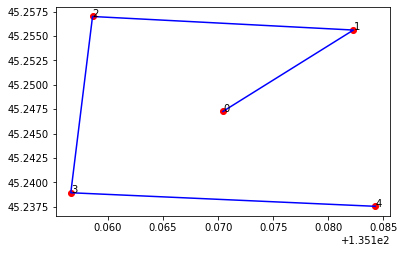

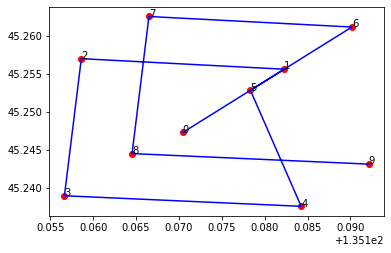

In [47]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID1728']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID3299


### 09h19m  +25d50m

problem setting offset for VFID2797 - already observed, or in INT filter gap?
139.81097388471662 25.845889266666664 1.2 1.2
pointing  VFID0001  ngal =  2


<Figure size 432x288 with 0 Axes>

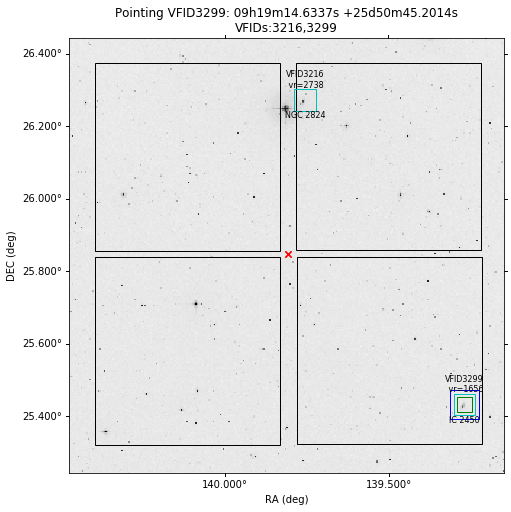

In [48]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID3299'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
091914.63 +255045.2
091916.86 +255115.2
091912.41 +255120.2
091912.04 +255015.2
091917.23 +255010.2
091914.63 +255045.2
091916.86 +255115.2
091912.41 +255120.2
091912.04 +255015.2
091917.23 +255010.2
091916.12 +255105.2
091918.34 +255135.2
091913.89 +255140.2
091913.52 +255035.2
091918.71 +255030.2


<Figure size 432x288 with 0 Axes>

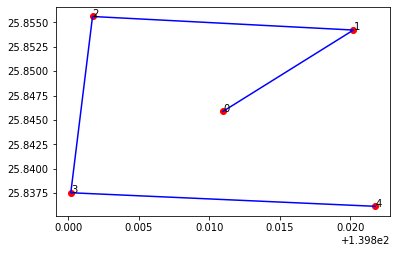

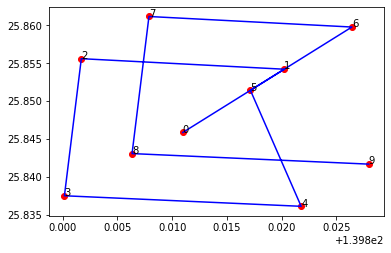

In [49]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID3299']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID1538

problem setting offset for VFID2797 - already observed, or in INT filter gap?
169.00244853403441 47.913764066666666 1.2 1.2
pointing  VFID0005  ngal =  4


<Figure size 432x288 with 0 Axes>

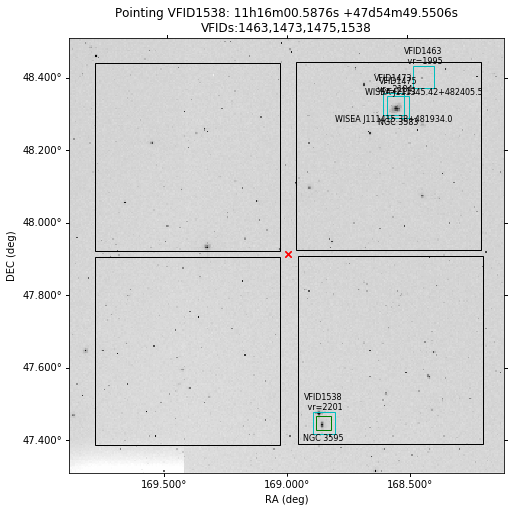

In [50]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID1538'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
111600.59 +475449.6
111603.57 +475519.6
111557.60 +475524.6
111557.11 +475419.6
111604.07 +475414.6
111600.59 +475449.6
111603.57 +475519.6
111557.60 +475524.6
111557.11 +475419.6
111604.07 +475414.6
111602.58 +475509.6
111605.56 +475539.6
111559.59 +475544.6
111559.10 +475439.6
111606.06 +475434.6


<Figure size 432x288 with 0 Axes>

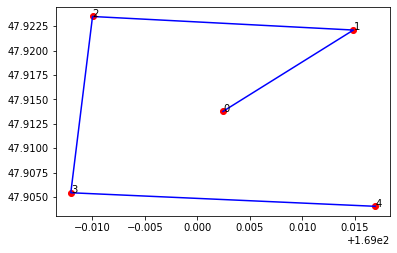

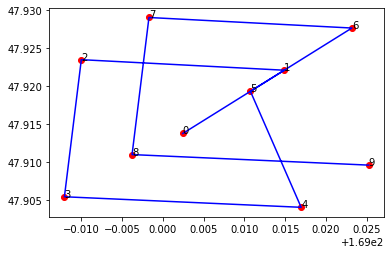

In [51]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID1538']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 2593

not sure if its better to have star in the gap or on the chip

problem setting offset for VFID2797 - already observed, or in INT filter gap?
163.5042732295464 34.10202496666667 1.2 1.2
pointing  VFID0004  ngal =  5


<Figure size 432x288 with 0 Axes>

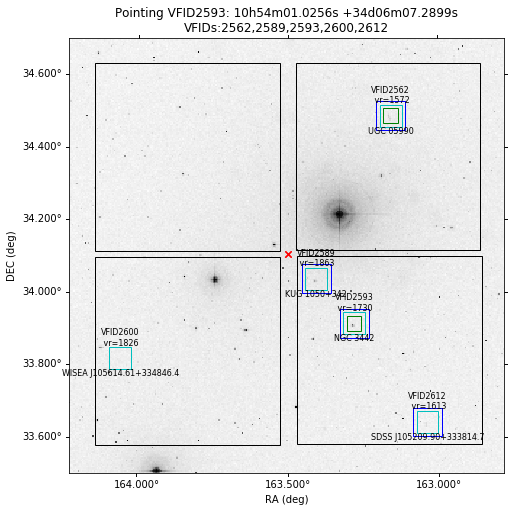

In [52]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2593'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
105401.03 +340607.3
105403.44 +340637.3
105358.61 +340642.3
105358.21 +340537.3
105403.84 +340532.3
105401.03 +340607.3
105403.44 +340637.3
105358.61 +340642.3
105358.21 +340537.3
105403.84 +340532.3
105402.64 +340627.3
105405.05 +340657.3
105400.22 +340702.3
105359.82 +340557.3
105405.45 +340552.3


<Figure size 432x288 with 0 Axes>

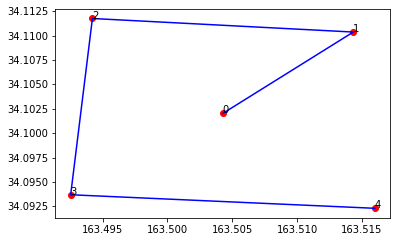

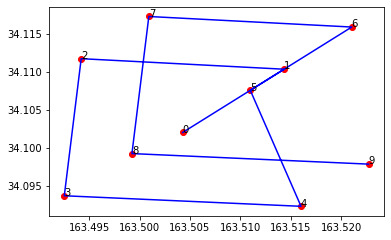

In [53]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2593']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID3272

problem setting offset for VFID2797 - already observed, or in INT filter gap?
172.35189578996827 25.9110799 1.2 1.2
pointing  VFID0008  ngal =  2


<Figure size 432x288 with 0 Axes>

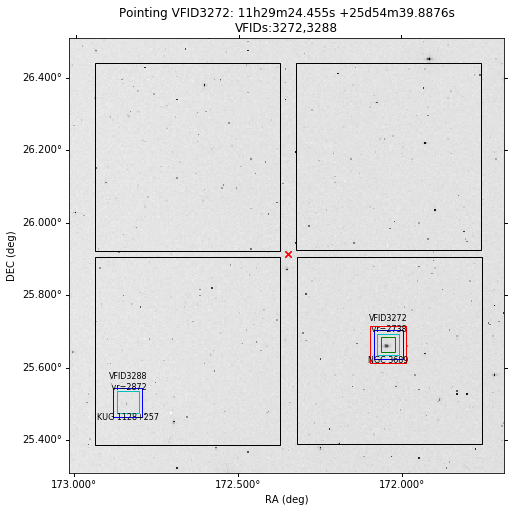

In [56]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID3272'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
112924.46 +255439.9
112926.68 +255509.9
112922.23 +255514.9
112921.86 +255409.9
112927.05 +255404.9
112924.46 +255439.9
112926.68 +255509.9
112922.23 +255514.9
112921.86 +255409.9
112927.05 +255404.9
112925.94 +255459.9
112928.16 +255529.9
112923.71 +255534.9
112923.34 +255429.9
112928.53 +255424.9


<Figure size 432x288 with 0 Axes>

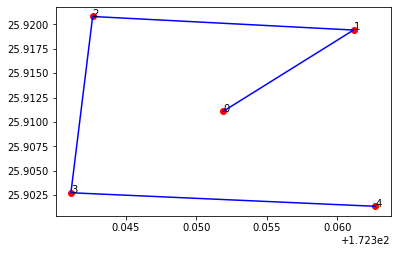

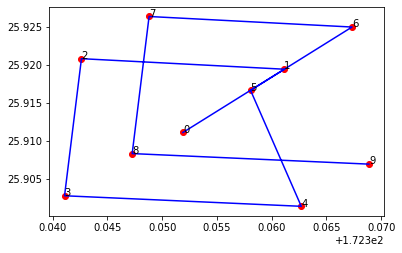

In [57]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID3272']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 2484

problem setting offset for VFID2797 - already observed, or in INT filter gap?
172.6075942829044 35.6639527 1.2 1.2
pointing  VFID0009  ngal =  9


<Figure size 432x288 with 0 Axes>

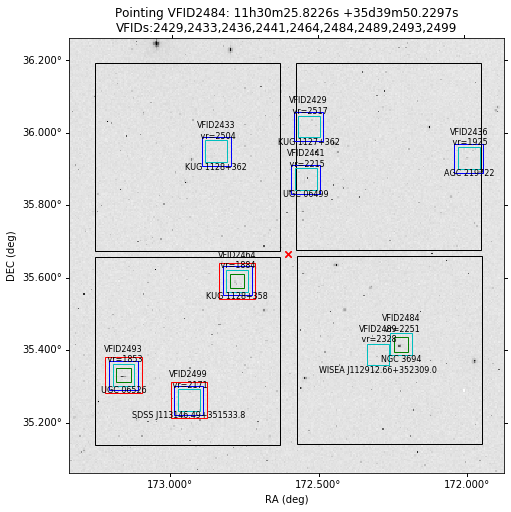

In [65]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2484'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
113025.82 +353950.2
113028.28 +354020.2
113023.36 +354025.2
113022.95 +353920.2
113028.69 +353915.2
113025.82 +353950.2
113028.28 +354020.2
113023.36 +354025.2
113022.95 +353920.2
113028.69 +353915.2
113027.46 +354010.2
113029.93 +354040.2
113025.00 +354045.2
113024.59 +353940.2
113030.34 +353935.2


<Figure size 432x288 with 0 Axes>

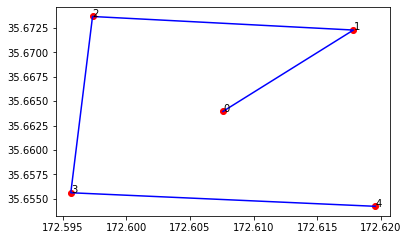

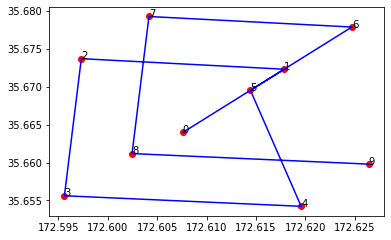

In [66]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2484']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 2357

problem setting offset for VFID2797 - already observed, or in INT filter gap?
173.16903786741472 36.9480246 1.2 1.2
pointing  VFID0011  ngal =  3


<Figure size 432x288 with 0 Axes>

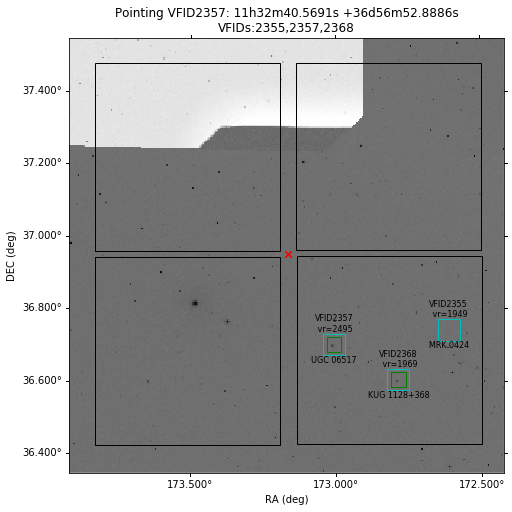

In [69]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2357'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
113240.57 +365652.9
113243.07 +365722.9
113238.07 +365727.9
113237.65 +365622.9
113243.49 +365617.9
113240.57 +365652.9
113243.07 +365722.9
113238.07 +365727.9
113237.65 +365622.9
113243.49 +365617.9
113242.24 +365712.9
113244.74 +365742.9
113239.73 +365747.9
113239.32 +365642.9
113245.16 +365637.9


<Figure size 432x288 with 0 Axes>

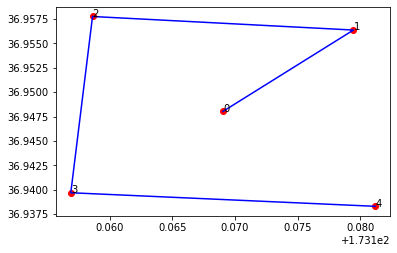

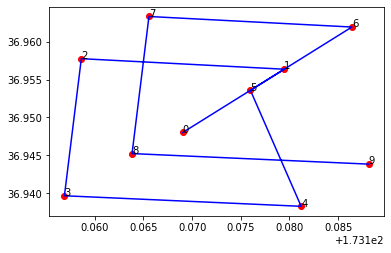

In [70]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2357']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 2704

problem setting offset for VFID2797 - already observed, or in INT filter gap?
173.72945667100566 33.033894000000004 1.2 1.2
pointing  VFID0012  ngal =  7


<Figure size 432x288 with 0 Axes>

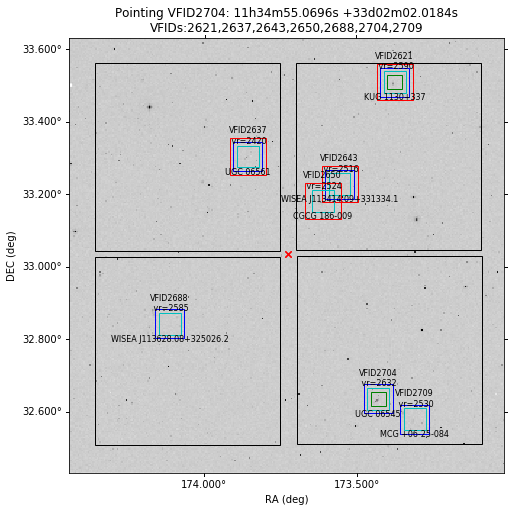

In [72]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2704'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
113455.07 +330202.0
113457.46 +330232.0
113452.68 +330237.0
113452.29 +330132.0
113457.85 +330127.0
113455.07 +330202.0
113457.46 +330232.0
113452.68 +330237.0
113452.29 +330132.0
113457.85 +330127.0
113456.66 +330222.0
113459.05 +330252.0
113454.27 +330257.0
113453.88 +330152.0
113459.44 +330147.0


<Figure size 432x288 with 0 Axes>

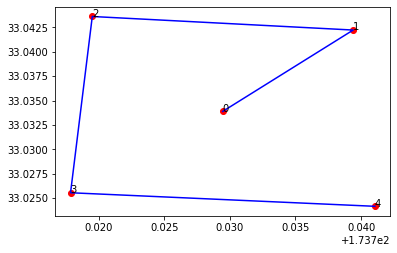

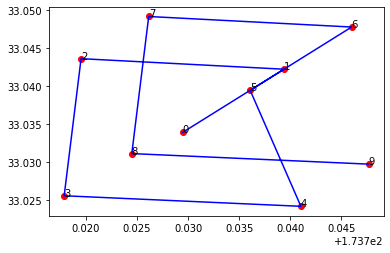

In [78]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2704']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID2601

problem setting offset for VFID2797 - already observed, or in INT filter gap?
175.07149713906927 34.23809163333334 1.2 1.2
pointing  VFID0013  ngal =  2


<Figure size 432x288 with 0 Axes>

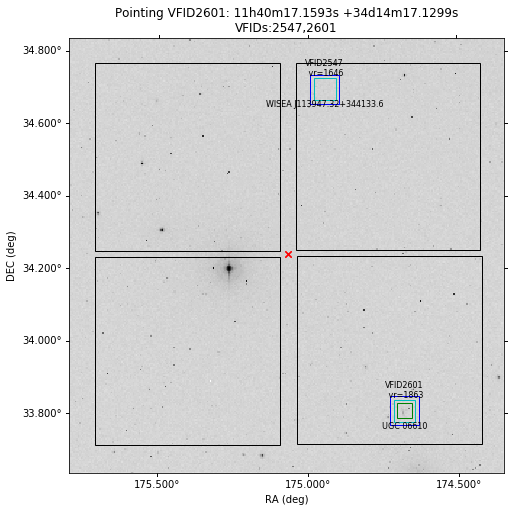

In [76]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2601'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
114017.16 +341417.1
114019.58 +341447.1
114014.74 +341452.1
114014.34 +341347.1
114019.98 +341342.1
114017.16 +341417.1
114019.58 +341447.1
114014.74 +341452.1
114014.34 +341347.1
114019.98 +341342.1
114018.77 +341437.1
114021.19 +341507.1
114016.35 +341512.1
114015.95 +341407.1
114021.59 +341402.1


<Figure size 432x288 with 0 Axes>

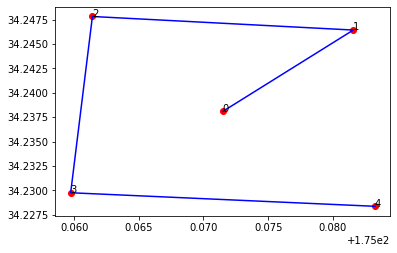

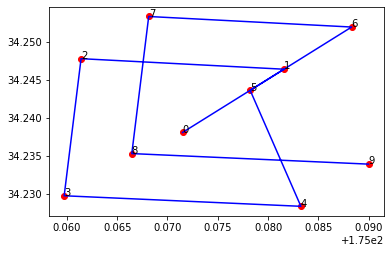

In [79]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2601']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 2821

problem setting offset for VFID2797 - already observed, or in INT filter gap?
186.86638026348314 31.556847033333334 1.2 1.2
pointing  VFID0034  ngal =  2


<Figure size 432x288 with 0 Axes>

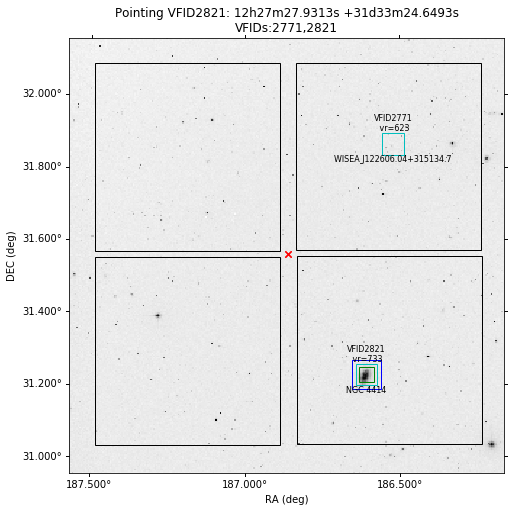

In [81]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2821'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
122727.93 +313324.6
122730.28 +313354.6
122725.58 +313359.6
122725.19 +313254.6
122730.67 +313249.6
122727.93 +313324.6
122730.28 +313354.6
122725.58 +313359.6
122725.19 +313254.6
122730.67 +313249.6
122729.50 +313344.6
122731.84 +313414.6
122727.15 +313419.6
122726.76 +313314.6
122732.23 +313309.6


<Figure size 432x288 with 0 Axes>

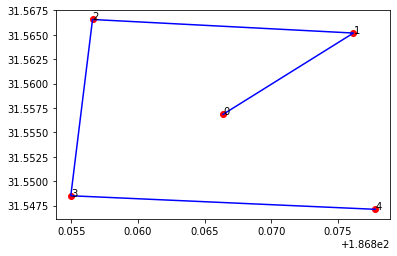

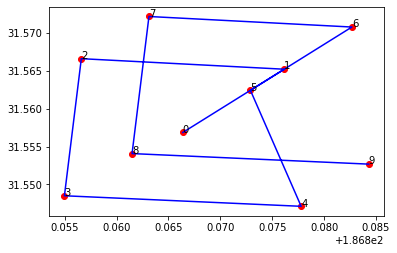

In [82]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2821']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID 2883

problem setting offset for VFID2797 - already observed, or in INT filter gap?
188.54401988567696 30.610854433333333 1.2 1.2
pointing  VFID0036  ngal =  2


<Figure size 432x288 with 0 Axes>

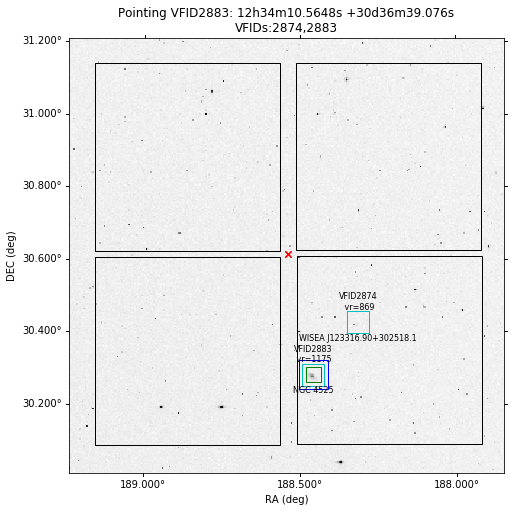

In [83]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2883'],BOK=True)

# VFID0501

problem setting offset for VFID2797 - already observed, or in INT filter gap?
222.9620439715406 60.6485749 1.2 1.2
pointing  VFID0062  ngal =  1


<Figure size 432x288 with 0 Axes>

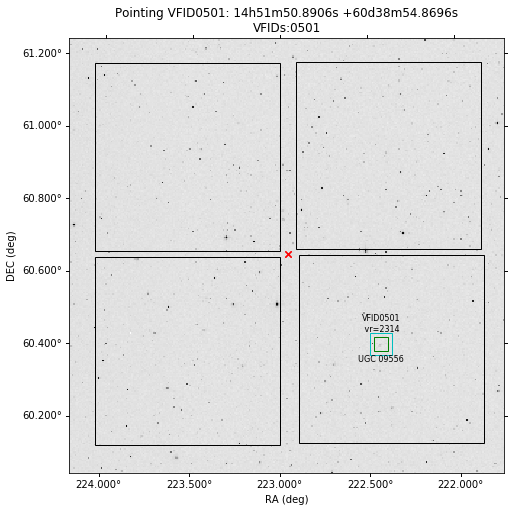

In [86]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID0501'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
145150.89 +603854.9
145154.97 +603924.9
145146.81 +603929.9
145146.13 +603824.9
145155.65 +603819.9
145150.89 +603854.9
145154.97 +603924.9
145146.81 +603929.9
145146.13 +603824.9
145155.65 +603819.9
145153.61 +603914.9
145157.69 +603944.9
145149.53 +603949.9
145148.85 +603844.9
145158.37 +603839.9


<Figure size 432x288 with 0 Axes>

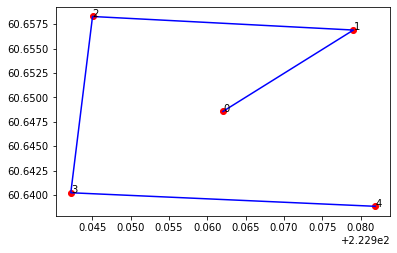

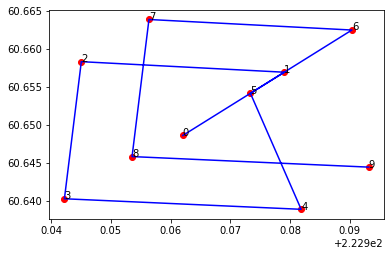

In [88]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID0501']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# VFID1573

### 13h30min + 46d50m

problem setting offset for VFID2797 - already observed, or in INT filter gap?
202.6695967563398 46.84382916666667 1.2 1.2
pointing  VFID0043  ngal =  14


<Figure size 432x288 with 0 Axes>

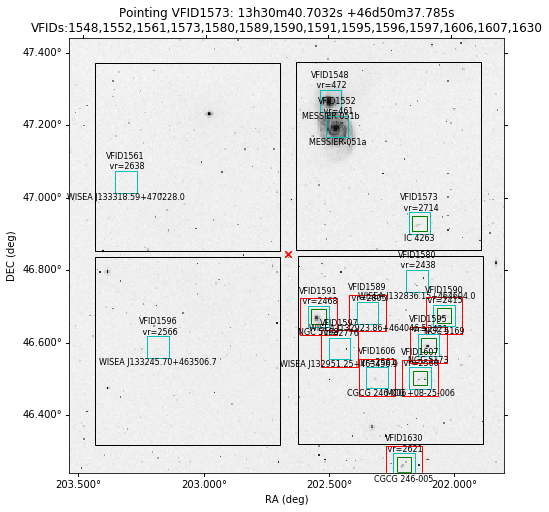

In [58]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID1573'],BOK=True)

problem setting offset for VFID2797 - already observed, or in INT filter gap?
133040.70 +465037.8
133043.63 +465107.8
133037.78 +465112.8
133037.29 +465007.8
133044.11 +465002.8
133040.70 +465037.8
133043.63 +465107.8
133037.78 +465112.8
133037.29 +465007.8
133044.11 +465002.8
133042.65 +465057.8
133045.58 +465127.8
133039.73 +465132.8
133039.24 +465027.8
133046.06 +465022.8


<Figure size 432x288 with 0 Axes>

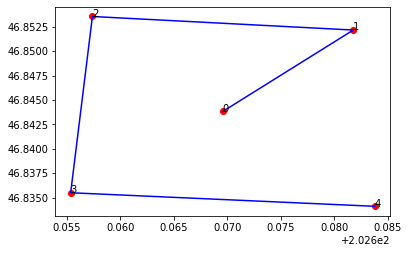

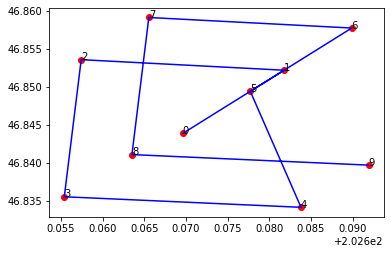

In [59]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID1573']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

# BOK Night 2!

* going to adjust the pointing centers to make use of the actual good chips!

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2797 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
139.81097388471662 25.845889266666664 1.2 1.2
pointing  VFID0000  ngal =  2


<Figure size 432x288 with 0 Axes>

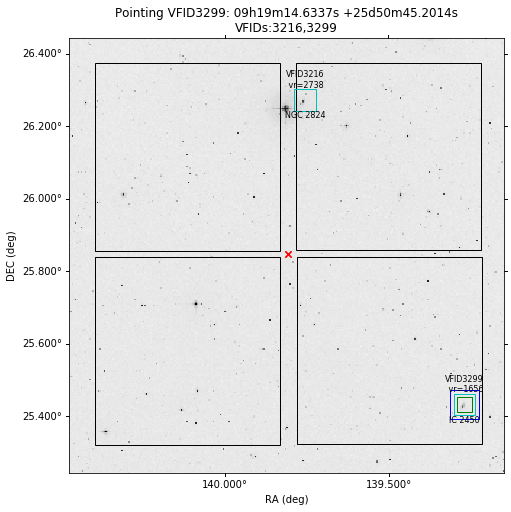

In [89]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID3299'],BOK=True)

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2797 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
091914.63 +255045.2
091916.86 +255115.2
091912.41 +255120.2
091912.04 +255015.2
091917.23 +255010.2
091914.63 +255045.2
091916.86 +255115.2
091912.41 +255120.2
091912.04 +255015.2
091917.23 +255010.2
091916.12 +255105.2
091918.34 +255135.2
091913.89 +255140.2
091913.52 +255035.2
091918.71 +255030.2


<Figure size 432x288 with 0 Axes>

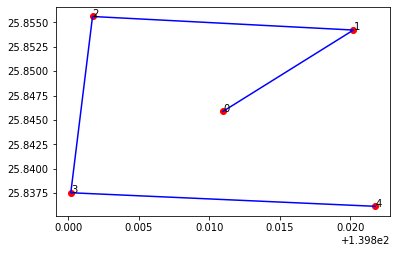

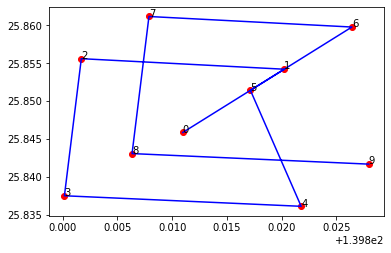

In [94]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID3299']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
163.35218018203494 34.816331733333335 1.2 1.2
pointing  VFID0002  ngal =  1


<Figure size 432x288 with 0 Axes>

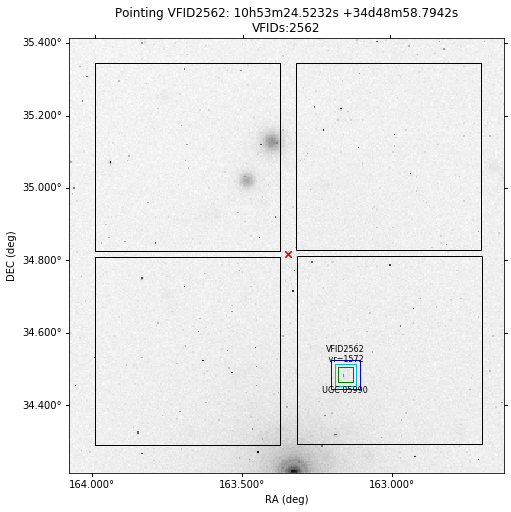

In [96]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2562'],BOK=True)

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
105324.52 +344858.8
105326.96 +344928.8
105322.09 +344933.8
105321.68 +344828.8
105327.37 +344823.8
105324.52 +344858.8
105326.96 +344928.8
105322.09 +344933.8
105321.68 +344828.8
105327.37 +344823.8
105326.15 +344918.8
105328.58 +344948.8
105323.71 +344953.8
105323.31 +344848.8
105328.99 +344843.8


<Figure size 432x288 with 0 Axes>

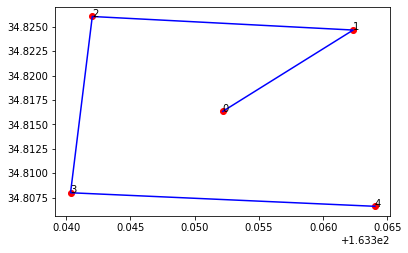

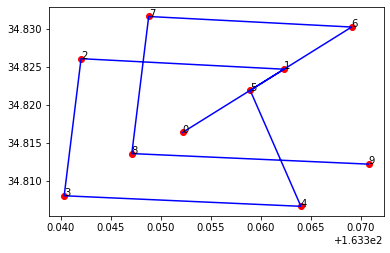

In [97]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2562']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
171.9958484375693 40.17973366666667 1.2 1.2
pointing  VFID0003  ngal =  1


<Figure size 432x288 with 0 Axes>

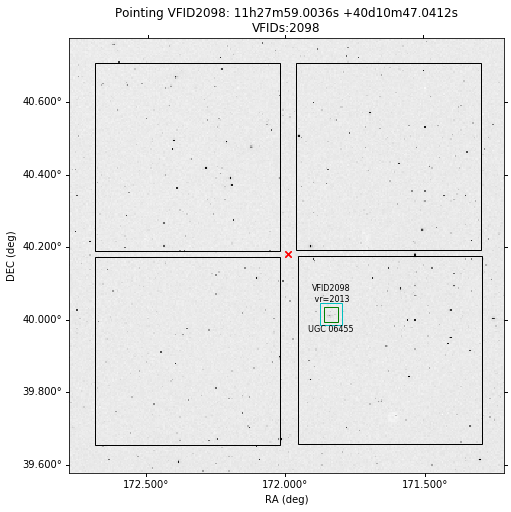

In [100]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2098'],BOK=True)

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
112759.00 +401047.0
112801.62 +401117.0
112756.39 +401122.0
112755.95 +401017.0
112802.06 +401012.0
112759.00 +401047.0
112801.62 +401117.0
112756.39 +401122.0
112755.95 +401017.0
112802.06 +401012.0
112800.75 +401107.0
112803.37 +401137.0
112758.13 +401142.0
112757.69 +401037.0
112803.80 +401032.0


<Figure size 432x288 with 0 Axes>

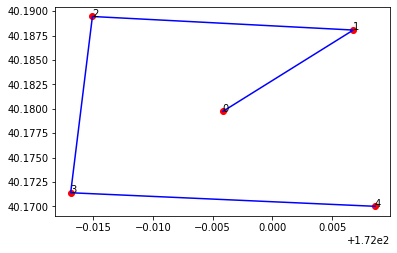

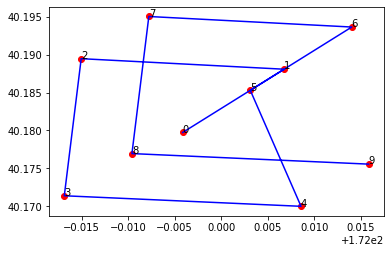

In [101]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2098']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
172.21127414280232 29.677675066666666 1.2 1.2
pointing  VFID0004  ngal =  2


<Figure size 432x288 with 0 Axes>

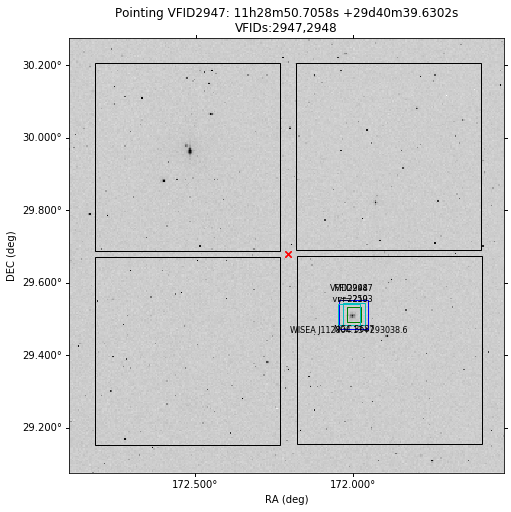

In [103]:
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID2947'],BOK=True)

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
112850.71 +294039.6
112853.01 +294109.6
112848.40 +294114.6
112848.02 +294009.6
112853.39 +294004.6
112850.71 +294039.6
112853.01 +294109.6
112848.40 +294114.6
112848.02 +294009.6
112853.39 +294004.6
112852.24 +294059.6
112854.54 +294129.6
112849.94 +294134.6
112849.55 +294029.6
112854.93 +294024.6


<Figure size 432x288 with 0 Axes>

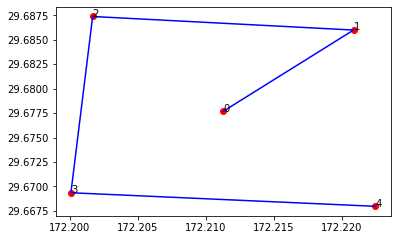

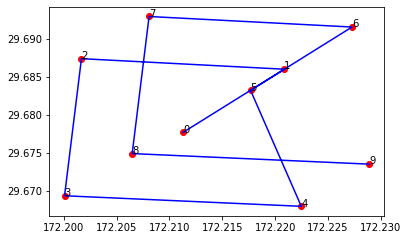

In [104]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2947']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
172.4016604326649 25.8610799 1.2 1.2
pointing  VFID0005  ngal =  2


<Figure size 432x288 with 0 Axes>

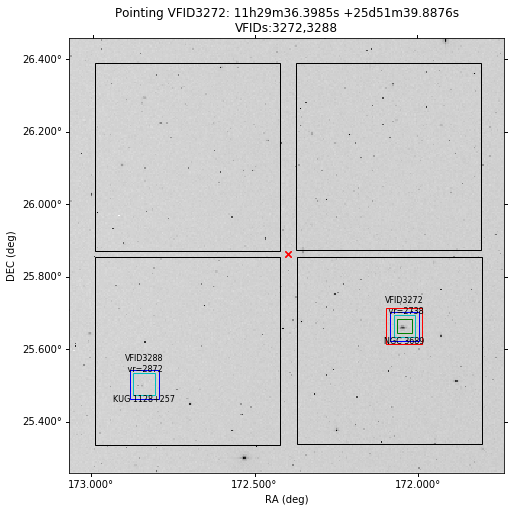

In [107]:
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID3272'],BOK=True)

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
112924.46 +255439.9
112926.68 +255509.9
112922.23 +255514.9
112921.86 +255409.9
112927.05 +255404.9
112924.46 +255439.9
112926.68 +255509.9
112922.23 +255514.9
112921.86 +255409.9
112927.05 +255404.9
112925.94 +255459.9
112928.16 +255529.9
112923.71 +255534.9
112923.34 +255429.9
112928.53 +255424.9


<Figure size 432x288 with 0 Axes>

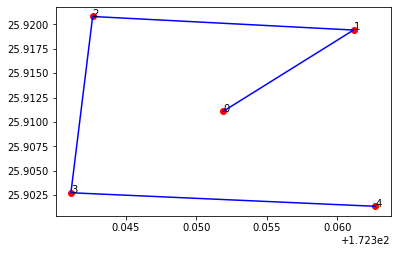

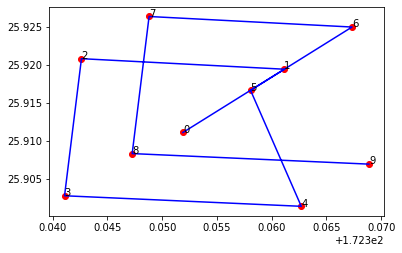

In [106]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID3272']
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')

problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
172.6075942829044 35.6639527 1.2 1.2
pointing  VFID0006  ngal =  9
113025.82 +353950.2
113028.28 +354020.2
113023.36 +354025.2
113022.95 +353920.2
113028.69 +353915.2
113025.82 +353950.2
113028.28 +354020.2
113023.36 +354025.2
113022.95 +353920.2
113028.69 +353915.2
113027.46 +354010.2
113029.93 +354040.2
113025.00 +354045.2
113024.59 +353940.2
113030.34 +353935.2


<Figure size 432x288 with 0 Axes>

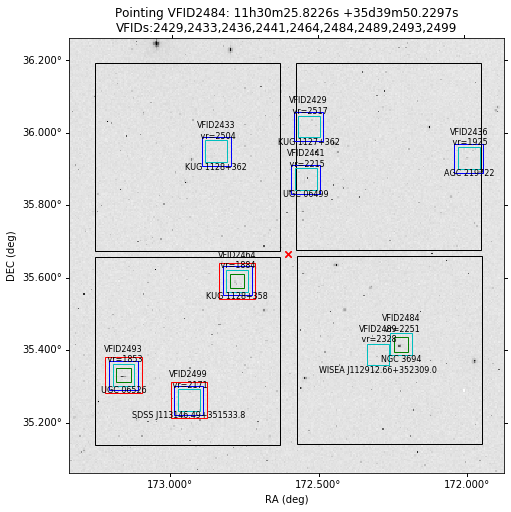

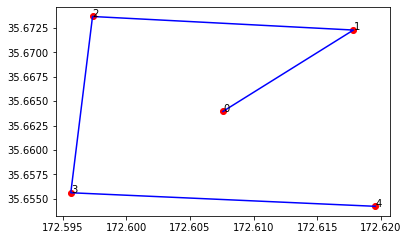

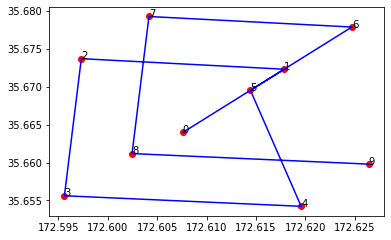

In [108]:
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2484']
platinum_finding_chart(i,BOK=True)
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')


problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
181.07817360800635 44.7812149 1.2 1.2
pointing  VFID0022  ngal =  2
120418.76 +444652.4
120421.58 +444722.4
120415.94 +444727.4
120415.47 +444622.4
120422.05 +444617.4
120418.76 +444652.4
120421.58 +444722.4
120415.94 +444727.4
120415.47 +444622.4
120422.05 +444617.4
120420.64 +444712.4
120423.46 +444742.4
120417.82 +444747.4
120417.35 +444642.4
120423.93 +444637.4


<Figure size 432x288 with 0 Axes>

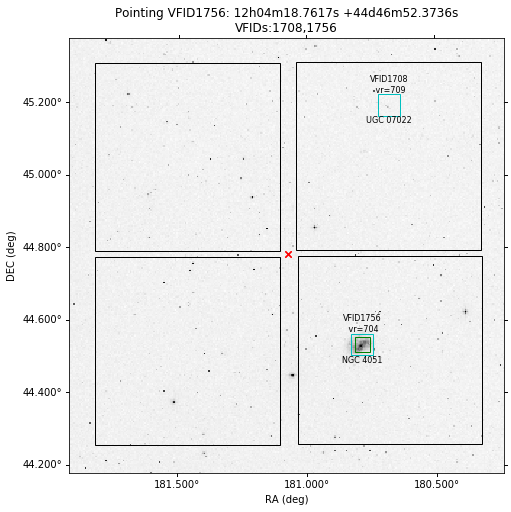

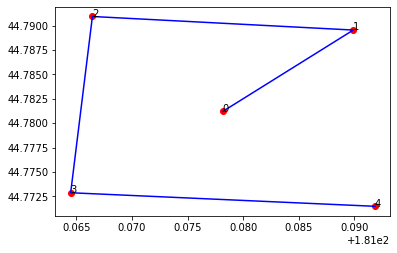

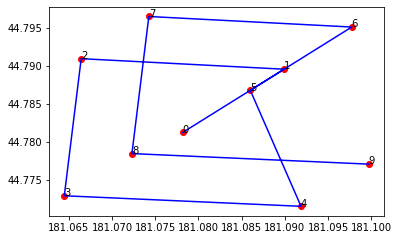

In [110]:
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID1756']
platinum_finding_chart(i,BOK=True)
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')


problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
198.7941012869208 35.82015333333334 1.2 1.2
pointing  VFID0040  ngal =  5
131510.58 +354912.6
131513.05 +354942.6
131508.12 +354947.6
131507.71 +354842.6
131513.46 +354837.6
131510.58 +354912.6
131513.05 +354942.6
131508.12 +354947.6
131507.71 +354842.6
131513.46 +354837.6
131512.23 +354932.6
131514.70 +355002.6
131509.76 +355007.6
131509.35 +354902.6
131515.11 +354857.6


<Figure size 432x288 with 0 Axes>

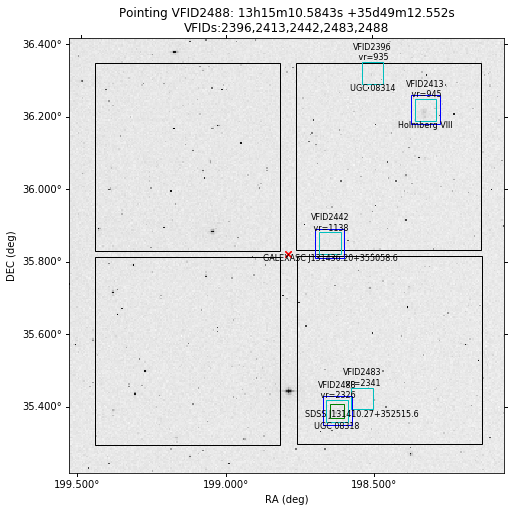

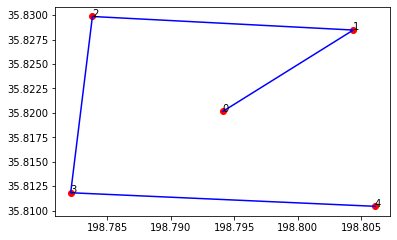

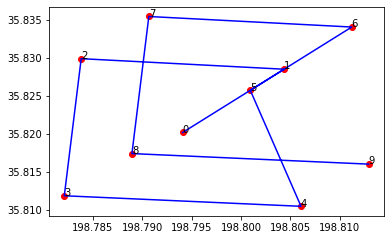

In [117]:
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID2488']
platinum_finding_chart(i,BOK=True)
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')


problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
209.593311080446 42.029625933333335 1.2 1.2
pointing  VFID0051  ngal =  3
135822.39 +420146.7
135825.09 +420216.7
135819.70 +420221.7
135819.25 +420116.7
135825.54 +420111.7
135822.39 +420146.7
135825.09 +420216.7
135819.70 +420221.7
135819.25 +420116.7
135825.54 +420111.7
135824.19 +420206.7
135826.88 +420236.7
135821.50 +420241.7
135821.05 +420136.7
135827.33 +420131.7


<Figure size 432x288 with 0 Axes>

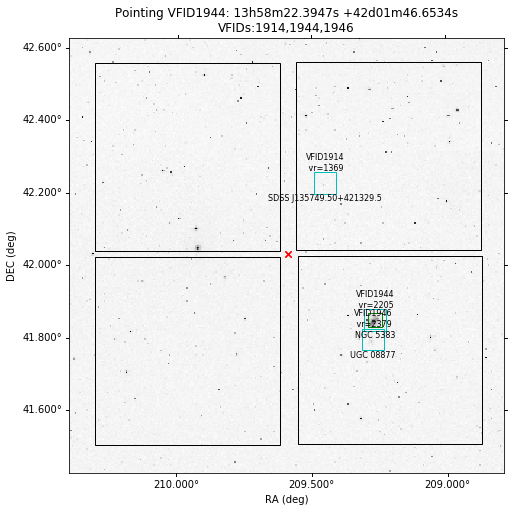

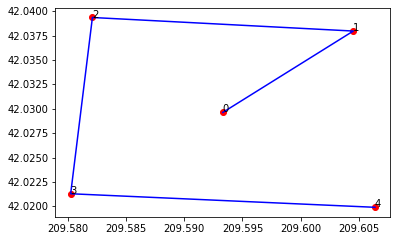

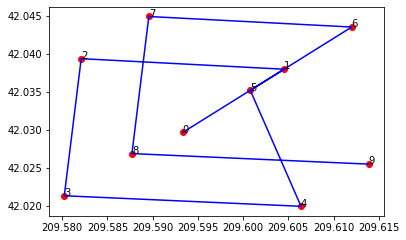

In [121]:
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID1944']
platinum_finding_chart(i,BOK=True)
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')


problem setting offset for VFID1538 - already observed, or in INT filter gap?
problem setting offset for VFID1728 - already observed, or in INT filter gap?
problem setting offset for VFID2303 - already observed, or in INT filter gap?
problem setting offset for VFID2357 - already observed, or in INT filter gap?
problem setting offset for VFID2593 - already observed, or in INT filter gap?
problem setting offset for VFID2821 - already observed, or in INT filter gap?
231.29938089805705 58.26964326666667 1.2 1.2
pointing  VFID0081  ngal =  2
152511.85 +581610.7
152515.65 +581640.7
152508.05 +581645.7
152507.41 +581540.7
152516.29 +581535.7
152511.85 +581610.7
152515.65 +581640.7
152508.05 +581645.7
152507.41 +581540.7
152516.29 +581535.7
152514.39 +581630.7
152518.19 +581700.7
152510.58 +581705.7
152509.95 +581600.7
152518.82 +581555.7


<Figure size 432x288 with 0 Axes>

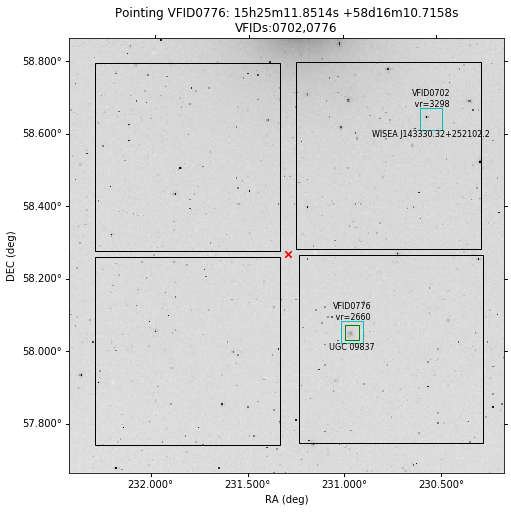

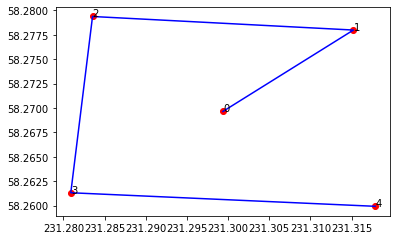

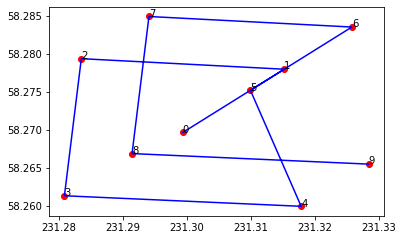

In [123]:
%run ~/github/Virgo/programs/observing-halpha.py
i=vfdict['VFID0776']
platinum_finding_chart(i,BOK=True)
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/dither-scripts/')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=1,exptime=120,filt='r')
bok_dither_make(pointing_id[i],pointing_ra[i],pointing_dec[i],dithsize=60,nexp=1,nloop=2,exptime=180,filt='Ha+4nm')